## Final Project Submission

* Student name: Anna Chantharasouk, Piotr Czolpik, Jeff Beech
* Student pace: Full time
* Scheduled project review: 01/07/2022, 1:30 pm 
* Instructor name: Skylar English
* Blog post URL:


## Project Summary
Our group has been employed by KC Realty Group of Seattle, WA to research and discover which combination of features in single-family homes most influence selling price. Our intent is to develop a multiple regresion model to reveal the top features that guide a home's price. For this project, we will be using the King County Housing Data Set for home sales in the year 2014 and 2015.



## Column Names and Descriptions for the King County Data Set

id - Unique identifier for a house<BR>
date - Date house was sold<BR>
price - Sale price (prediction target)<BR>
bedrooms - Number of bedrooms<BR>
bathrooms - Number of bathrooms<BR>
sqft_living - Square footage of living space in the home<BR>
sqft_lot - Square footage of the lot<BR>
floors - Number of floors (levels) in house<BR>
waterfront - Whether the house is on a waterfront<BR>
view - Quality of view from house<BR>
condition - How good the overall condition of the house is. Related to maintenance of house.<BR>
grade - Overall grade of the house. Related to the construction and design of the house.<BR>
sqft_above - Square footage of house apart from basement<BR>
sqft_basement - Square footage of the basement<BR>
yr_built - Year when house was built<BR>
yr_renovated - Year when house was renovated<BR>
zipcode - ZIP Code used by the United States Postal Service<BR>
lat - Latitude coordinate<BR>
long - Longitude coordinate<BR>
sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors<BR>
sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors<BR>

## Questions to be used in analysis

### As we have discussed how to go about meeting their goals, we are centering our work around 3 questions:
<BR>
Which features are most highly correlated with price?
<BR>
Which features are most highly correlated with each other?
<BR>
Which combinations of features best predict house prices in a multiple regression model?

## Analyzing the data

### Imports

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from statsmodels.formula.api import ols
from sklearn import datasets, linear_model
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor


### Initial look at data

In [108]:
#loading csv data

df_kc = pd.read_csv('data/kc_house_data.csv', index_col='id')
df_kc

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id                                                                             
7129300520  10/13/2014  221900.0         3       1.00         1180      5650   
6414100192   12/9/2014  538000.0         3       2.25         2570      7242   
5631500400   2/25/2015  180000.0         2       1.00          770     10000   
2487200875   12/9/2014  604000.0         4       3.00         1960      5000   
1954400510   2/18/2015  510000.0         3       2.00         1680      8080   
...                ...       ...       ...        ...          ...       ...   
263000018    5/21/2014  360000.0         3       2.50         1530      1131   
6600060120   2/23/2015  400000.0         4       2.50         2310      5813   
1523300141   6/23/2014  402101.0         2       0.75         1020      1350   
291310100    1/16/2015  400000.0         3       2.50         1600      2388   
1523300157  10/15/2014  325000.0         2       0.75         1020      1076   

            floors waterfront  view  condition          grade  sqft_above  \
id                                                                          
7129300520     1.0        NaN  NONE    Average      7 Average        1180   
6414100192     2.0         NO  NONE    Average      7 Average        2170   
5631500400     1.0         NO  NONE    Average  6 Low Average         770   
2487200875     1.0         NO  NONE  Very Good      7 Average        1050   
1954400510     1.0         NO  NONE    Average         8 Good        1680   
...            ...        ...   ...        ...            ...         ...   
263000018      3.0         NO  NONE    Average         8 Good        1530   
6600060120     2.0         NO  NONE    Average         8 Good        2310   
1523300141     2.0         NO  NONE    Average      7 Average        1020   
291310100      2.0        NaN  NONE    Average         8 Good        1600   
1523300157     2.0         NO  NONE    Average      7 Average        1020   

           sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
id                                                                            
7129300520           0.0      1955           0.0    98178  47.5112 -122.257   
6414100192         400.0      1951        1991.0    98125  47.7210 -122.319   
5631500400           0.0      1933           NaN    98028  47.7379 -122.233   
2487200875         910.0      1965           0.0    98136  47.5208 -122.393   
1954400510           0.0      1987           0.0    98074  47.6168 -122.045   
...                  ...       ...           ...      ...      ...      ...   
263000018            0.0      2009           0.0    98103  47.6993 -122.346   
6600060120           0.0      2014           0.0    98146  47.5107 -122.362   
1523300141           0.0      2009           0.0    98144  47.5944 -122.299   
291310100            0.0      2004           0.0    98027  47.5345 -122.069   
1523300157           0.0      2008           0.0    98144  47.5941 -122.299   

            sqft_living15  sqft_lot15  
id                                     
7129300520           1340        5650  
6414100192           1690        7639  
5631500400           2720        8062  
2487200875           1360        5000  
1954400510           1800        7503  
...                   ...         ...  
263000018            1530        1509  
6600060120           1830        7200  
1523300141           1020        2007  
291310100            1410        1287  
1523300157           1020        1357  

[21597 rows x 20 columns]

In [109]:
df_kc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  object 
 8   view           21534 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  object 
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

In [110]:
df_kc.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  2.159700e+04   
mean   5.402966e+05      3.373200      2.115826   2080.321850  1.509941e+04   
std    3.673681e+05      0.926299      0.768984    918.106125  4.141264e+04   
min    7.800000e+04      1.000000      0.500000    370.000000  5.200000e+02   
25%    3.220000e+05      3.000000      1.750000   1430.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068500e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    sqft_above      yr_built  yr_renovated       zipcode  \
count  21597.000000  21597.000000  21597.000000  17755.000000  21597.000000   
mean       1.494096   1788.596842   1970.999676     83.636778  98077.951845   
std        0.539683    827.759761     29.375234    399.946414     53.513072   
min        1.000000    370.000000   1900.000000      0.000000  98001.000000   
25%        1.000000   1190.000000   1951.000000      0.000000  98033.000000   
50%        1.500000   1560.000000   1975.000000      0.000000  98065.000000   
75%        2.000000   2210.000000   1997.000000      0.000000  98118.000000   
max        3.500000   9410.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000   21597.000000   21597.000000  
mean      47.560093   -122.213982    1986.620318   12758.283512  
std        0.138552      0.140724     685.230472   27274.441950  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471100   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.231000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

### Distribution of variables

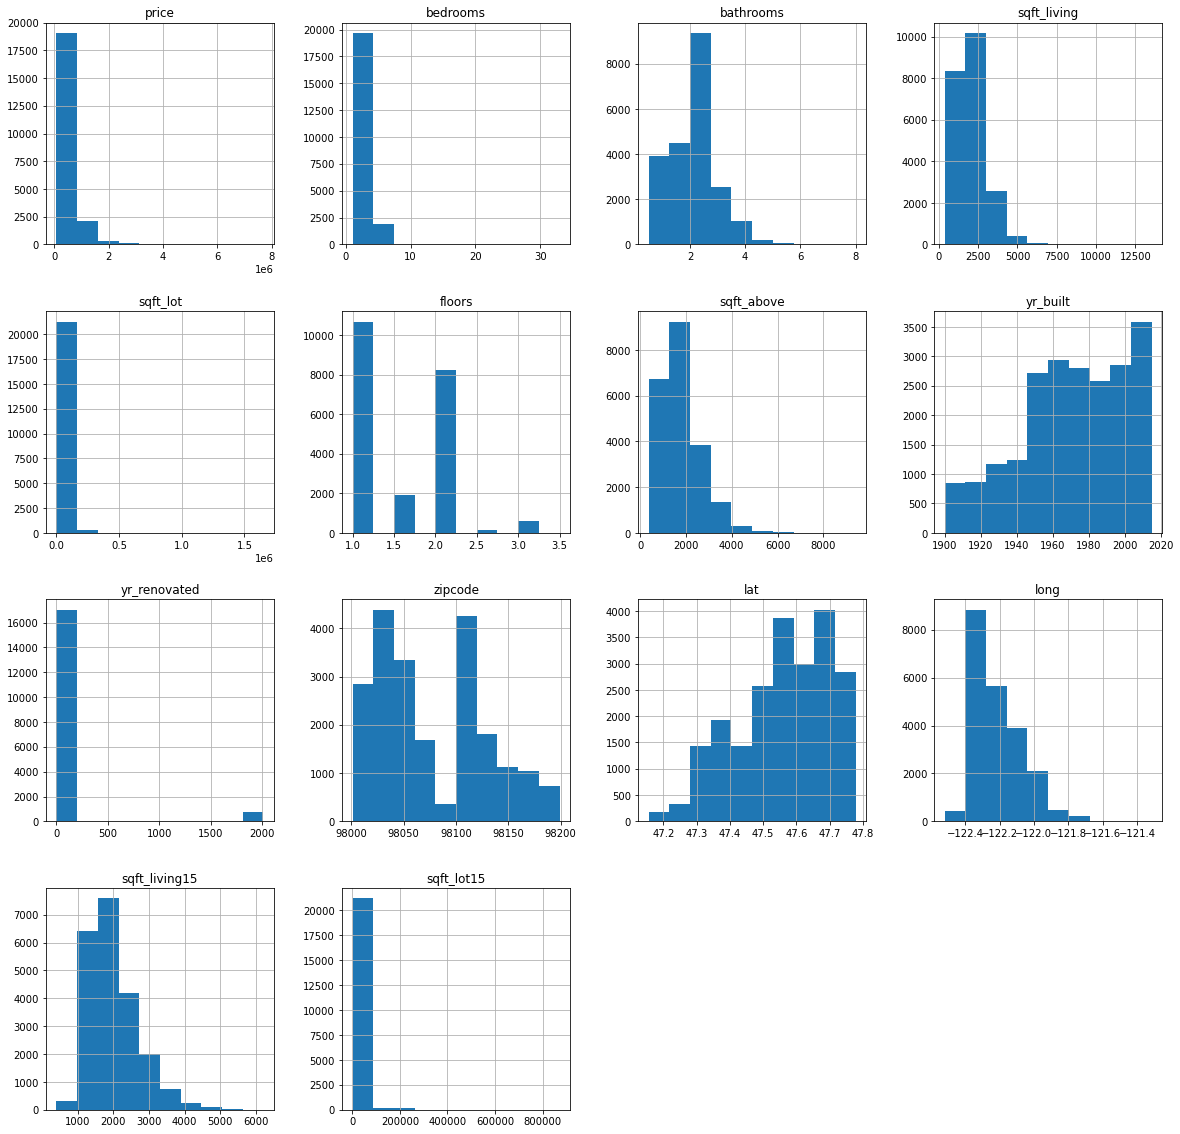

In [111]:
df_kc.hist(figsize=(20,20));

Normal distribution is not common within this data set, so that is difinitely an issue we'll have to deal with as we work through the data.  

## Drop unnecessary columns

These are columns we decided we would not use in our analysis, either because they were irrevelant for our work or did not provide enough data to warrant its inclusion.

In [112]:
df_kc.drop(['date', 'yr_renovated','condition','zipcode','sqft_basement'],axis=1, inplace=True)


In [113]:
df_kc

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
id                                                                         
7129300520  221900.0         3       1.00         1180      5650     1.0   
6414100192  538000.0         3       2.25         2570      7242     2.0   
5631500400  180000.0         2       1.00          770     10000     1.0   
2487200875  604000.0         4       3.00         1960      5000     1.0   
1954400510  510000.0         3       2.00         1680      8080     1.0   
...              ...       ...        ...          ...       ...     ...   
263000018   360000.0         3       2.50         1530      1131     3.0   
6600060120  400000.0         4       2.50         2310      5813     2.0   
1523300141  402101.0         2       0.75         1020      1350     2.0   
291310100   400000.0         3       2.50         1600      2388     2.0   
1523300157  325000.0         2       0.75         1020      1076     2.0   

           waterfront  view          grade  sqft_above  yr_built      lat  \
id                                                                          
7129300520        NaN  NONE      7 Average        1180      1955  47.5112   
6414100192         NO  NONE      7 Average        2170      1951  47.7210   
5631500400         NO  NONE  6 Low Average         770      1933  47.7379   
2487200875         NO  NONE      7 Average        1050      1965  47.5208   
1954400510         NO  NONE         8 Good        1680      1987  47.6168   
...               ...   ...            ...         ...       ...      ...   
263000018          NO  NONE         8 Good        1530      2009  47.6993   
6600060120         NO  NONE         8 Good        2310      2014  47.5107   
1523300141         NO  NONE      7 Average        1020      2009  47.5944   
291310100         NaN  NONE         8 Good        1600      2004  47.5345   
1523300157         NO  NONE      7 Average        1020      2008  47.5941   

               long  sqft_living15  sqft_lot15  
id                                              
7129300520 -122.257           1340        5650  
6414100192 -122.319           1690        7639  
5631500400 -122.233           2720        8062  
2487200875 -122.393           1360        5000  
1954400510 -122.045           1800        7503  
...             ...            ...         ...  
263000018  -122.346           1530        1509  
6600060120 -122.362           1830        7200  
1523300141 -122.299           1020        2007  
291310100  -122.069           1410        1287  
1523300157 -122.299           1020        1357  

[21597 rows x 15 columns]

## Removing outliers

We chose to eliminate houses with less than 6 bedrooms or less than 5 bathrooms in order to eliminate outliers

In [114]:
df_kc['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [115]:
df_kc['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [116]:
#Filtering out data to only include bedrooms with 5 or less

df_kc=df_kc[df_kc['bedrooms']<=5]

In [117]:
#Filtering out data to only include bathrooms with 4 or less

df_kc=df_kc[df_kc['bathrooms']<=4]

## Removing nulls and dropping / replacing values

The waterfront column had missing values, which we replaced with 'NO', since almost all the values were 'NO' already.  We then converted the "YES' values to 1 and the 'NO' values to 0 in order to use them in our model.

In [118]:
df_kc['waterfront'] = df_kc['waterfront'].fillna('NO')

In [119]:
df_kc['waterfront'] = df_kc['waterfront'].replace(["NO"], 0).replace(["YES"], 1)

In [120]:
df_kc['waterfront'].value_counts()

0    20934
1      127
Name: waterfront, dtype: int64

We converted the values in the 'waterfront' variable from a string to integers for use in our models

In [121]:
df_kc['view'].value_counts()

NONE         19039
AVERAGE        903
GOOD           466
FAIR           317
EXCELLENT      277
Name: view, dtype: int64

In [122]:
df_kc['view'] = df_kc['view'].replace(["NONE"], 0).replace(["FAIR"], 1).replace(["AVERAGE"], 2).replace(["GOOD"], 3).replace(["EXCELLENT"], 4).replace(["NaN"], 0)



In [123]:
df_kc['view'] = df_kc['view'].fillna(0)

In [124]:
df_kc['view'].value_counts()

0.0    19098
2.0      903
3.0      466
1.0      317
4.0      277
Name: view, dtype: int64

## More data cleaning

The 'grade' has both a numerical value and text.  We removed the text and converted the column to an integer type

In [208]:
#checking 'grade' column and found that we need to split the data

df_kc['grade'].value_counts()

7     8846
8     5948
9     2556
6     2030
10    1043
11     310
5      239
12      57
4       27
13       4
3        1
Name: grade, dtype: int64

In [126]:
#splitting the data column

df_kc['grade']=df_kc.grade.str.split(expand=True)

In [127]:
#casting the string into an int

df_kc['grade']=df_kc['grade'].astype(int)

In [209]:
#checking the grade column to make sure it is split correctly

df_kc['grade'].value_counts()

7     8846
8     5948
9     2556
6     2030
10    1043
11     310
5      239
12      57
4       27
13       4
3        1
Name: grade, dtype: int64

In [129]:
#verifying that 'grade' is an int

df_kc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21061 entries, 7129300520 to 1523300157
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21061 non-null  float64
 1   bedrooms       21061 non-null  int64  
 2   bathrooms      21061 non-null  float64
 3   sqft_living    21061 non-null  int64  
 4   sqft_lot       21061 non-null  int64  
 5   floors         21061 non-null  float64
 6   waterfront     21061 non-null  int64  
 7   view           21061 non-null  float64
 8   grade          21061 non-null  int64  
 9   sqft_above     21061 non-null  int64  
 10  yr_built       21061 non-null  int64  
 11  lat            21061 non-null  float64
 12  long           21061 non-null  float64
 13  sqft_living15  21061 non-null  int64  
 14  sqft_lot15     21061 non-null  int64  
dtypes: float64(6), int64(9)
memory usage: 2.6 MB


## Final data prep

For running our models, we are using these variables as our x variables to see how these features correlate to price and to each other:<BR>

bedrooms<BR>
waterfront<BR>
view<BR>
bathrooms<BR>
sqft_livingv
sqft_lot<BR>
floors<BR>
grade<BR>
sqft_above<BR>
yr_built<BR>
sqft_living15<BR>
sqft_lot15<BR>

Our target, or y, variable is 'price"

In [130]:
#determining which columns to look at

x_columns = ['bedrooms', 'waterfront', 'view', 'bathrooms','sqft_living','sqft_lot','floors','grade','sqft_above','yr_built', 'sqft_living15','sqft_lot15']

df_kc2 = df_kc[x_columns]
df_kc2['price'] = df_kc['price']
df_kc = df_kc2

<ipython-input-130-66bbf8c5479f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kc2['price'] = df_kc['price']


In [131]:
df_kc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21061 entries, 7129300520 to 1523300157
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21061 non-null  int64  
 1   waterfront     21061 non-null  int64  
 2   view           21061 non-null  float64
 3   bathrooms      21061 non-null  float64
 4   sqft_living    21061 non-null  int64  
 5   sqft_lot       21061 non-null  int64  
 6   floors         21061 non-null  float64
 7   grade          21061 non-null  int64  
 8   sqft_above     21061 non-null  int64  
 9   yr_built       21061 non-null  int64  
 10  sqft_living15  21061 non-null  int64  
 11  sqft_lot15     21061 non-null  int64  
 12  price          21061 non-null  float64
dtypes: float64(4), int64(9)
memory usage: 2.2 MB


### Check Correlations and Multicollinearity

Our first two questions deal with how strongly a home's price is correlated to feature variable, and understanding which feature variables are strongly correlated to each other, which can deeply affect our models.  The charts and data below assist in those determinations

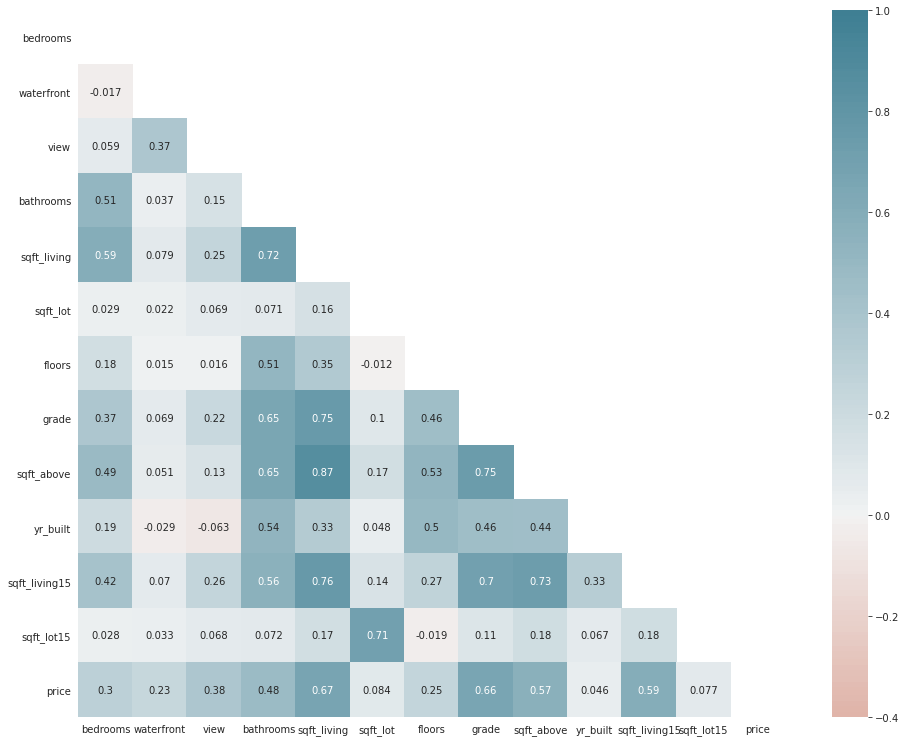

In [210]:
#creating heatmap to get a better visual of the data's correlation

corr = df_kc.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(17, 13))
    ax = sns.heatmap(corr, cmap = sns.diverging_palette(20, 220, n = 200),annot= True, 
                     xticklabels = corr.columns.values,
                     yticklabels = corr.columns.values,
                     vmin = -.4,
                     vmax = 1,
                     center = 0,
                     mask=mask, square=True)

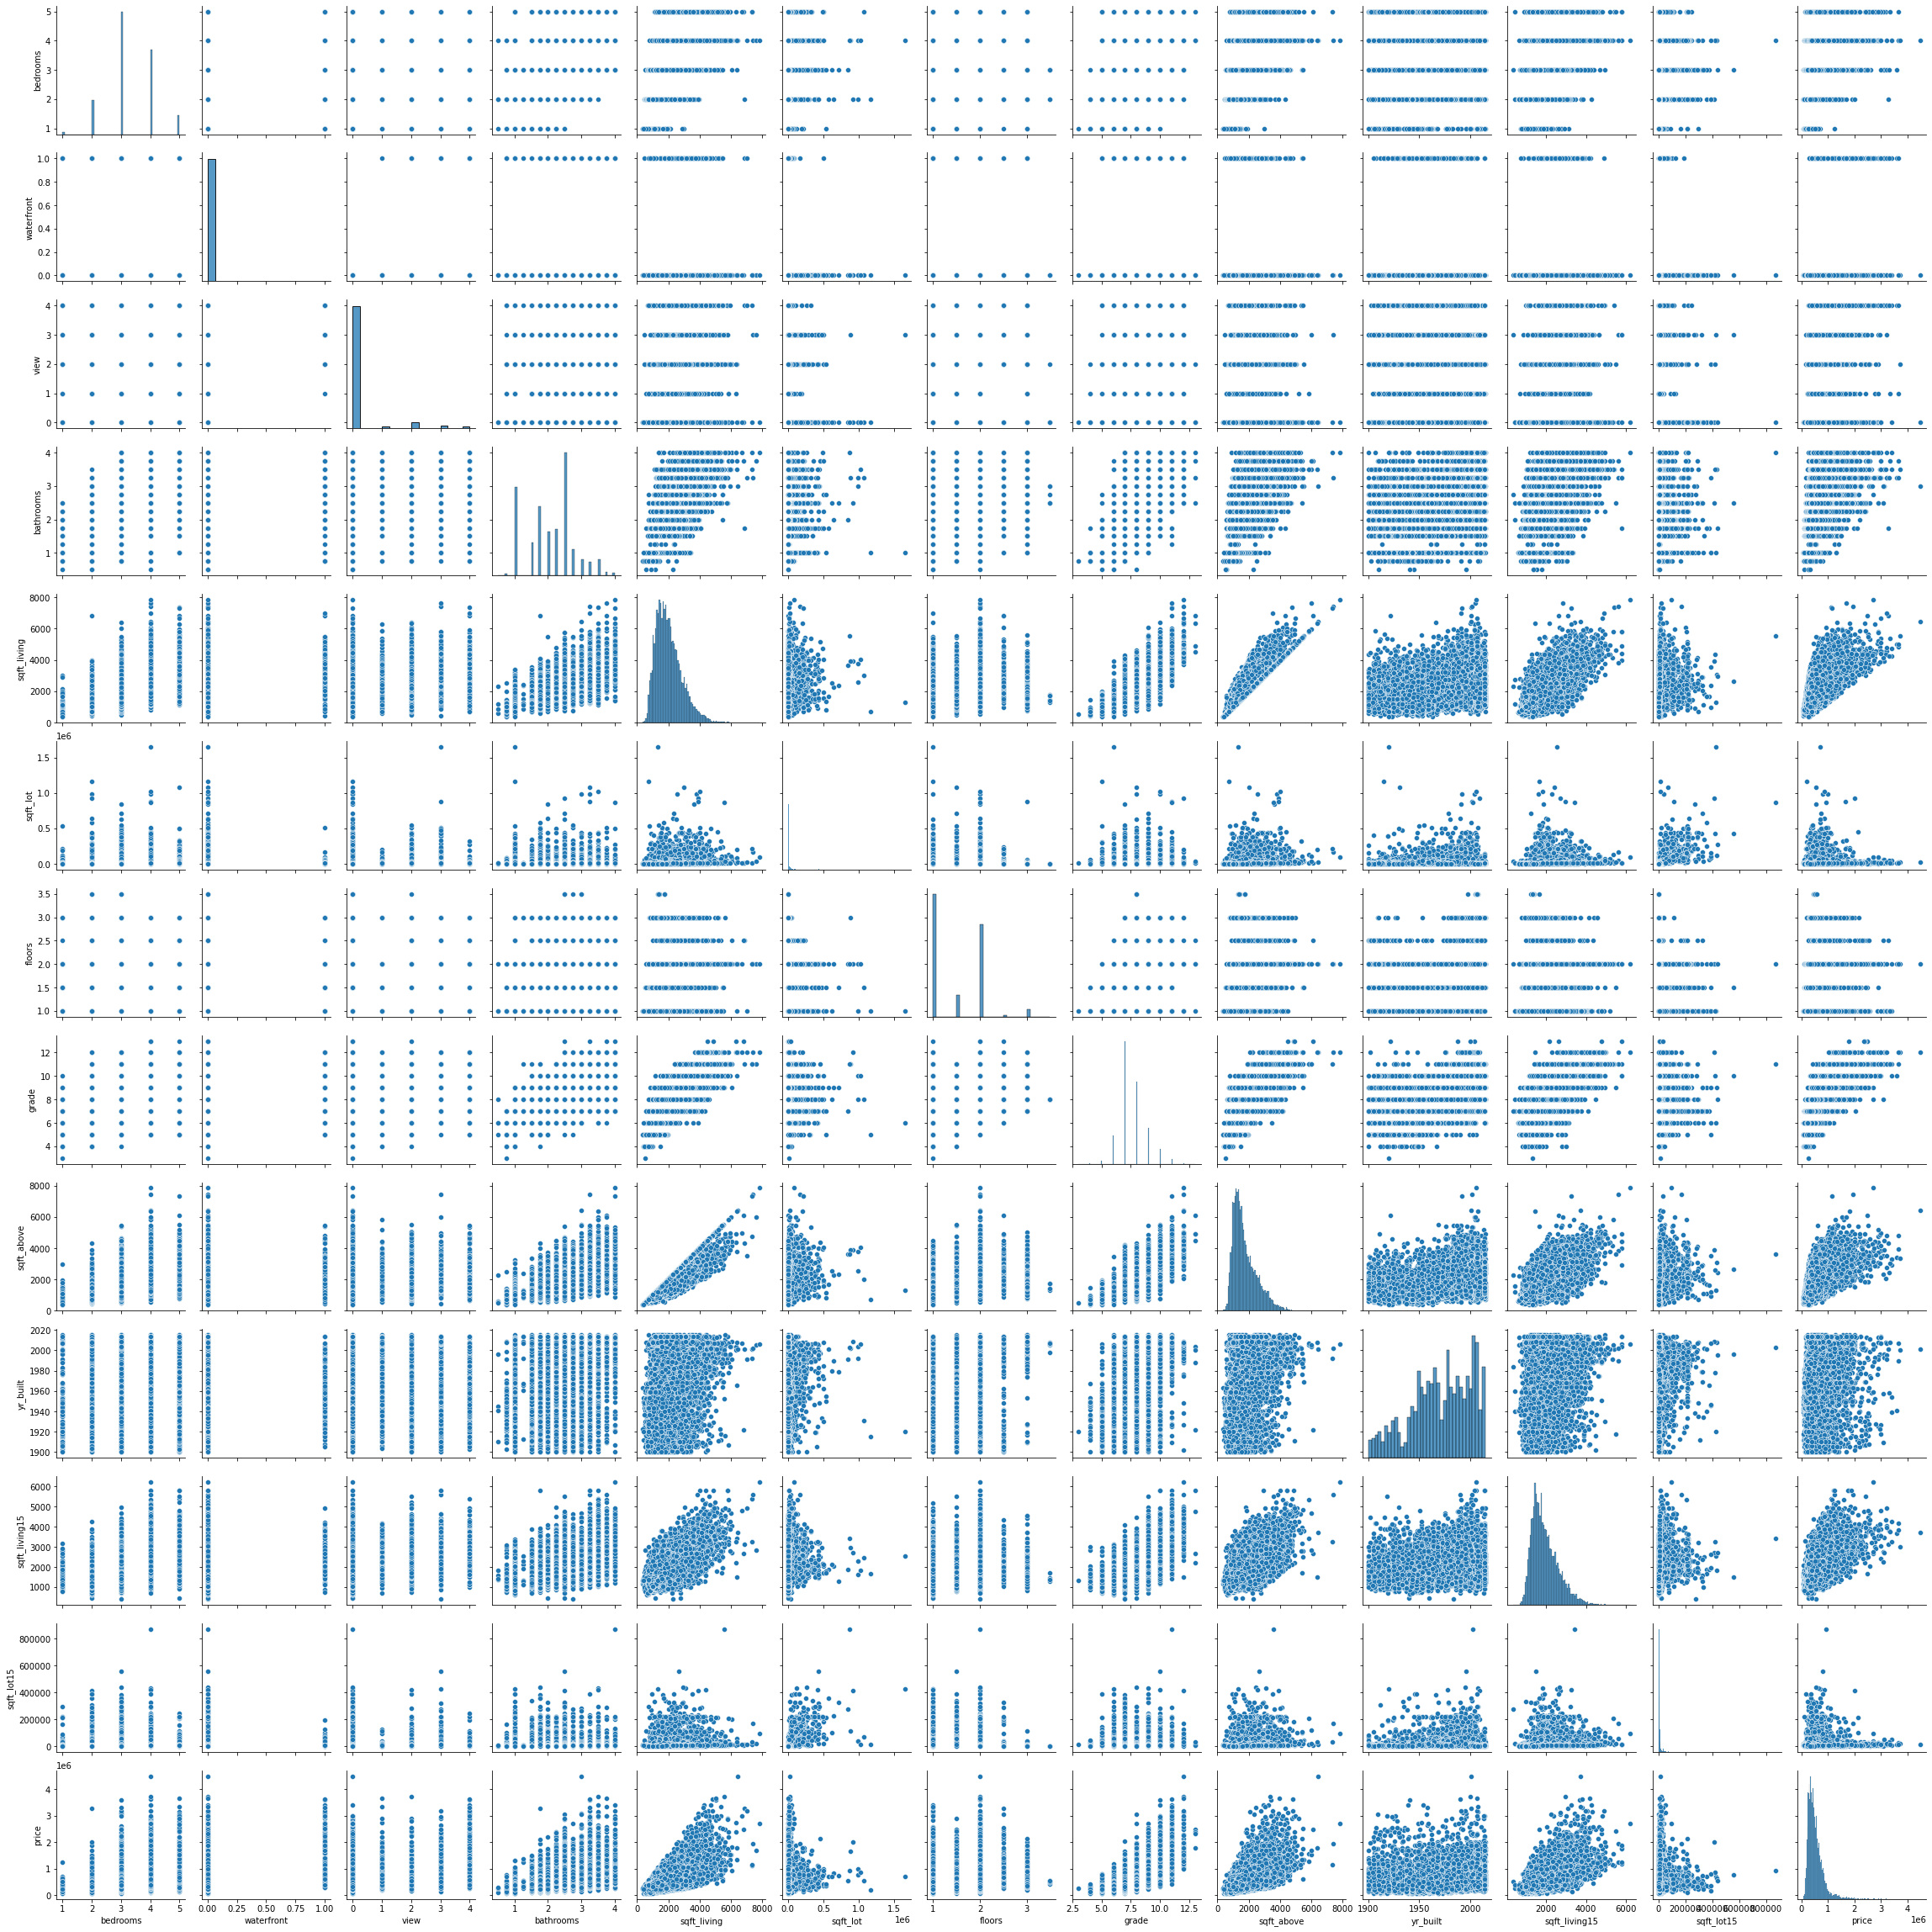

In [228]:
# Pair plots to strain our eyes
sns.pairplot(df_kc)
# sns.pairplot(df_kc, vars = ['bedrooms', 'waterfront', 'view', 'bathrooms','sqft_living','sqft_lot','floors','grade','sqft_above','yr_built', 'sqft_living15','sqft_lot15'], dropna = True)

###  This produces a DataFrame that sorts the features most correlated to price from highest to lowest

In [233]:
features = []
correlations = []
for idx, correlation in corr['price'].T.iteritems():
    if correlation >= .2 and idx != 'price':
        features.append(idx)
        correlations.append(correlation)
corr_price_df = pd.DataFrame({'Correlations':correlations, 'Features': features}).sort_values(by=['Correlations'], ascending=False)

corr_price_df

Correlations       Features
4      0.671091    sqft_living
6      0.664058          grade
8      0.591469  sqft_living15
7      0.569847     sqft_above
3      0.476202      bathrooms
2      0.377976           view
0      0.299802       bedrooms
5      0.252606         floors
1      0.232981     waterfront

Because sqft_above is so closely correlated with sqft_living and several other variables, it will likely not be used in most of our models

###  This produces a DataFrame that sorts the features most correlated to each other from highest to lowest

In [237]:
Multicollinear_Features = []
Multicollinear_Corr = []
def check_multicollinearity(feature):
    for idx, correlation in corr[feature].T.iteritems():
        if correlation >= .70 and idx != feature:
            Multicollinear_Features.append([feature, idx])
            Multicollinear_Corr.append(correlation)
            
for feature in corr:
    check_multicollinearity(feature)
MC_df = pd.DataFrame({'Correlations':Multicollinear_Corr, 'Features': Multicollinear_Features}).sort_values(by=['Correlations'], ascending=False)

MC_df

Correlations                      Features
3       0.866220     [sqft_living, sqft_above]
9       0.866220     [sqft_above, sqft_living]
4       0.763473  [sqft_living, sqft_living15]
12      0.763473  [sqft_living15, sqft_living]
2       0.754325          [sqft_living, grade]
6       0.754325          [grade, sqft_living]
7       0.745109           [grade, sqft_above]
10      0.745109           [sqft_above, grade]
11      0.733418   [sqft_above, sqft_living15]
14      0.733418   [sqft_living15, sqft_above]
0       0.724376      [bathrooms, sqft_living]
1       0.724376      [sqft_living, bathrooms]
5       0.709223        [sqft_lot, sqft_lot15]
15      0.709223        [sqft_lot15, sqft_lot]
8       0.703419        [grade, sqft_living15]
13      0.703419        [sqft_living15, grade]

#### Here are some graphs that show correlation of some individual features to price

<Figure size 432x288 with 0 Axes>

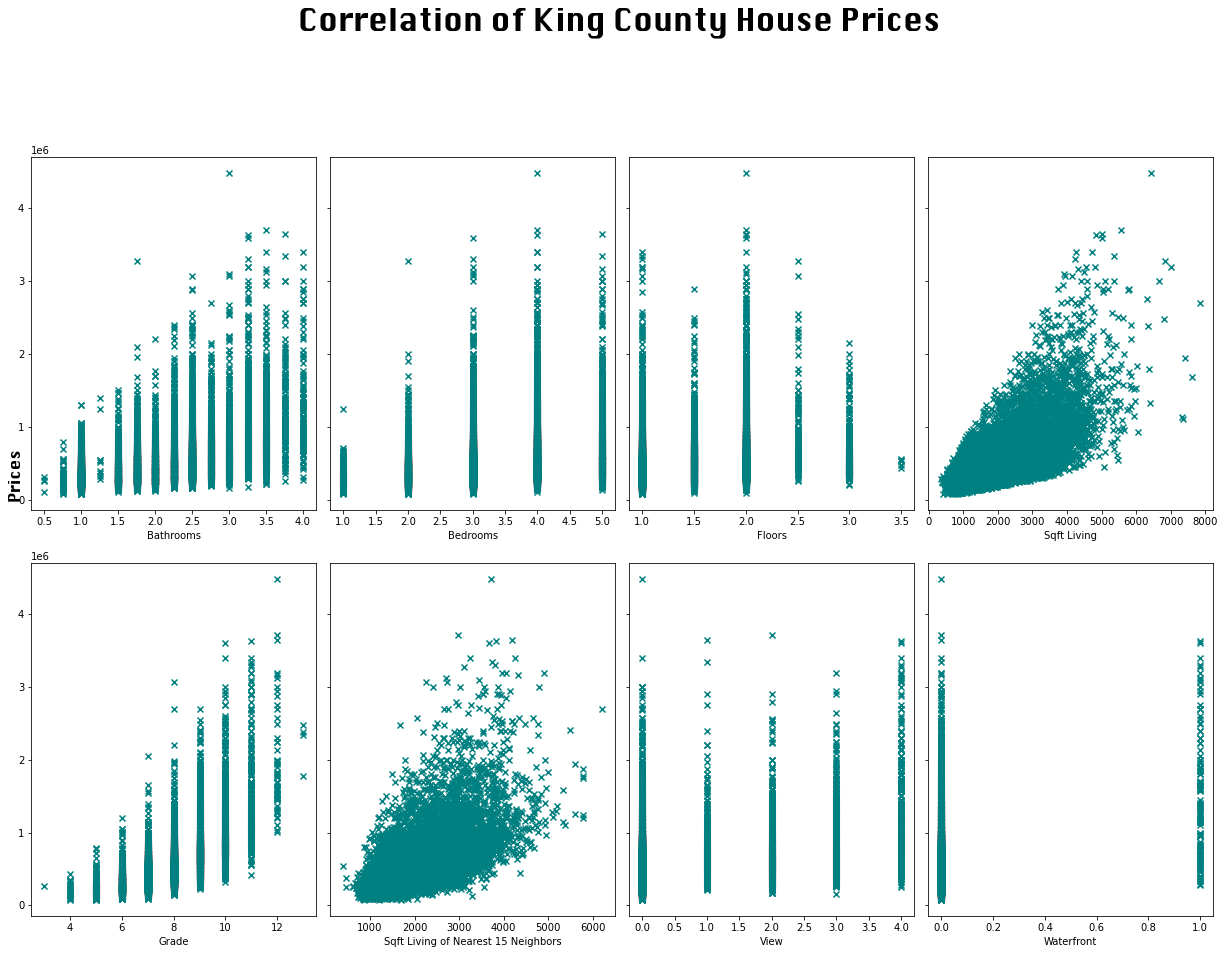

In [261]:
f = plt.figure()
f, axes = plt.subplots(nrows = 2, ncols = 4, sharex=False, sharey = True, figsize=(17,12))

f.suptitle('Correlation of King County House Prices', fontsize=30, y=1.1, fontname='Silom')
f.text(0.0001, 0.56, 'Prices', va='center', rotation='vertical', fontsize=16, fontname='Silom')

sc = axes[0][0].scatter(bath, price, c= "teal", marker = "x")
axes[0][0].set_xlabel('Bathrooms')

axes[0][1].scatter(bed, price, c= "teal",marker = "x")
axes[0][1].set_xlabel('Bedrooms')

axes[1][0].scatter(grade, price, c= "teal",marker = "x")
axes[1][0].set_xlabel('Grade')

axes[1][1].scatter(sqft_living15, price, c= "teal",marker = "x")
axes[1][1].set_xlabel('Sqft Living of Nearest 15 Neighbors')

axes[0][2].scatter(floors, price, c= "teal",marker = "x")
axes[0][2].set_xlabel('Floors')

axes[1][2].scatter(view, price, c= "teal", marker = "x")
axes[1][2].set_xlabel('View')

sc = axes[0][3].scatter(sqft_living, price, c= "teal",marker = "x")
axes[0][3].set_xlabel('Sqft Living')

sc = axes[1][3].scatter(waterfront, price, c= "teal",marker = "x")
axes[1][3].set_xlabel('Waterfront')



f.tight_layout()
plt.show();

## Question 1 - which features are most correlated with price?

Most often, a correlation of 0.7 or higher is considered highly correlated to price, however, none of our variables meet that threshold.  Nonetheless, there are several variables just under the 0.7 mark - sqft_living, grade, sqft_living15, sqft_above and bathrooms represent the top five.

## Question 2 - which features are most correlated with other feature variables?

Most notable is the strong correlation between sqft_living and sqft_above, and sensibly so, since in houses without a basement, the two values would likely be the same.  Also, sqft_above is strong correlated with several other variables as well, so it will be dropped in most of our models to avoid multicollinearity.  

Object creation of possible variables that will need to be used for our models

In [138]:
price = df_kc['price']
bath = df_kc['bathrooms']
bed = df_kc['bedrooms']
grade = df_kc['grade']
sqft_living15 = df_kc['sqft_living15']
floors = df_kc['floors']
sqft_living = df_kc['sqft_living']
sqft_above = df_kc['sqft_above']
waterfront = df_kc['waterfront']
view = df_kc['view']
sqft_lot = df_kc['sqft_lot']
yr_built = df_kc['yr_built']
sqft_lot15 = df_kc['sqft_lot15']

price_log = np.log(df_kc['price'])
bath_log = np.log(df_kc['bathrooms'])
bed_log = np.log(df_kc['bedrooms'])
grade_log = np.log(df_kc['grade'])
sqft_living15_log = np.log(df_kc['sqft_living15'])
floors_log = np.log(df_kc['floors'])
sqft_living_log = np.log(df_kc['sqft_living'])
sqft_above_log = np.log(df_kc['sqft_above'])
waterfront_log = np.log(df_kc['waterfront'])
view_log = np.log(df_kc['view'])
sqft_lot_log = np.log(df_kc['sqft_lot'])
yr_built_log = np.log(df_kc['yr_built'])
sqft_lot15_log = np.log(df_kc['sqft_lot15'])

/Users/jeff/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


#### One last look at the DataFrame to make sure we're ready to begin creating and testing our models

In [140]:
df_kc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21061 entries, 7129300520 to 1523300157
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21061 non-null  int64  
 1   waterfront     21061 non-null  int64  
 2   view           21061 non-null  float64
 3   bathrooms      21061 non-null  float64
 4   sqft_living    21061 non-null  int64  
 5   sqft_lot       21061 non-null  int64  
 6   floors         21061 non-null  float64
 7   grade          21061 non-null  int64  
 8   sqft_above     21061 non-null  int64  
 9   yr_built       21061 non-null  int64  
 10  sqft_living15  21061 non-null  int64  
 11  sqft_lot15     21061 non-null  int64  
 12  price          21061 non-null  float64
dtypes: float64(4), int64(9)
memory usage: 2.2 MB


# Train - Test Split

The key purpose of splitting the dataset into training and test sets is to estimate how well the learned model will generalize to new data. For this reason, train - test split is an essential component of building models.  

##  Model 1 - All x variables

In [249]:
xx = df_kc.drop(['price'], axis = 1).values
yy = df_kc['price'].values
x_train, x_test, y_train, y_test = train_test_split(xx,yy,test_size = .1)

In [250]:
Reg=LinearRegression()

In [251]:
Reg.fit(x_train, y_train)

LinearRegression()

In [252]:
Reg.score(x_test, y_test)

0.636359133826242

In [253]:
Reg.score(x_train, y_train)

0.6373132097572058

In [254]:
dummy=DummyRegressor()

In [255]:
dummy.fit(x_train, y_train)

DummyRegressor()

In [256]:
dummy.score(x_test, y_test)

-9.102719936260328e-05

In [257]:
y_pred = Reg.predict(x_test)
y_pred

array([927253.10031639, 595126.29134165, 370882.91413958, ...,
       678669.87035913, 199965.04423257, 375599.58858777])

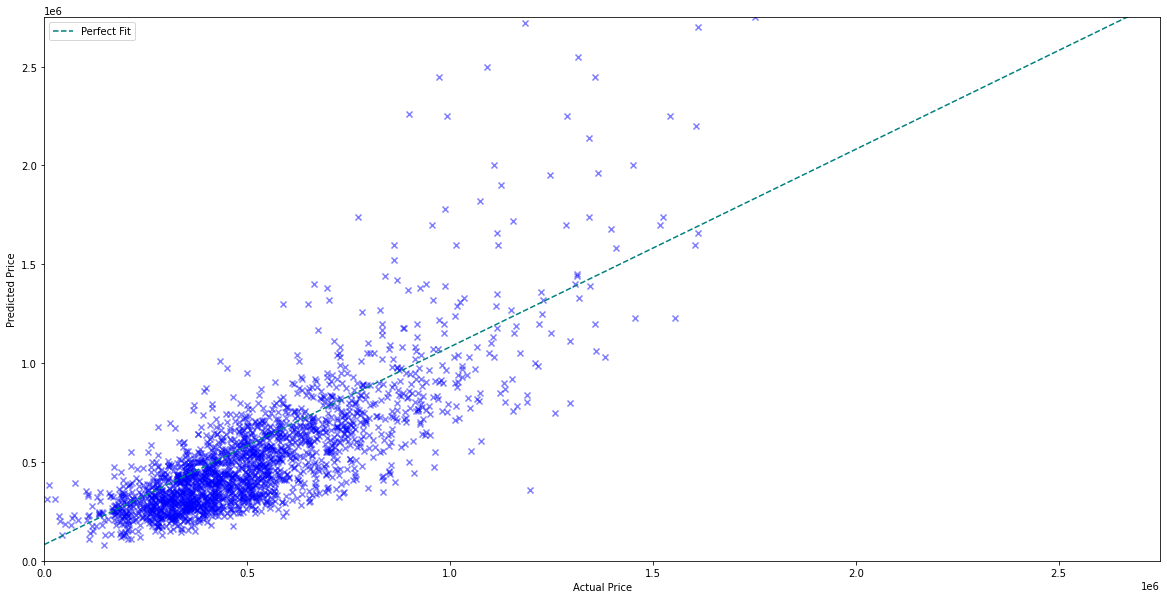

In [272]:
fig, ax = plt.subplots(figsize=(20,10))

perfect_line = np.arange(y_test.min(), y_test.max())
ax.plot(perfect_line, linestyle="--", color="teal", label="Perfect Fit")
ax.scatter(y_pred, y_test, alpha=0.5,marker= "x",color= "blue")
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
plt.title('', fontsize=16, y=.99, fontname='Silom')
ax.legend()
plt.xlim([0,2750000])
plt.ylim([0,2750000]);

## Multiple Regression Model 1 with all variables

### With standardization

In [192]:
y = df_kc['price']
x = df_kc.drop(['price'], axis = 1)

x_scaler = StandardScaler()
x_standard = x_scaler.fit_transform(x)

y_scaler = StandardScaler()
y_standard = y_scaler.fit_transform(y.values.reshape(-1,1))


In [193]:
model1_fit = OLS(y_standard,x_standard).fit()
model1_fit_summ = model1_fit.summary()

model1_fit_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.637
Model:                            OLS   Adj. R-squared (uncentered):              0.637
Method:                 Least Squares   F-statistic:                              3082.
Date:                Thu, 06 Jan 2022   Prob (F-statistic):                        0.00
Time:                        19:47:31   Log-Likelihood:                         -19205.
No. Observations:               21061   AIC:                                  3.843e+04
Df Residuals:                   21049   BIC:                                  3.853e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0847      0.005    -15.826      0.000      -0.095      -0.074
x2             0.1188      0.004     26.472      0.000       0.110       0.128
x3             0.0992      0.005     20.581      0.000       0.090       0.109
x4             0.0776      0.007     10.616      0.000       0.063       0.092
x5             0.3741      0.012     32.328      0.000       0.351       0.397
x6             0.0081      0.006      1.367      0.172      -0.004       0.020
x7             0.0645      0.006     11.114      0.000       0.053       0.076
x8             0.4293      0.007     58.841      0.000       0.415       0.444
x9            -0.0613      0.010     -5.943      0.000      -0.081      -0.041
x10           -0.3268      0.005    -59.827      0.000      -0.338      -0.316
x11            0.1021      0.007     14.546      0.000       0.088       0.116
x12           -0.0396      0.006     -6.637      0.000      -0.051      -0.028
==============================================================================
Omnibus:                    10795.311   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           199485.787
Skew:                           2.039   Prob(JB):                         0.00
Kurtosis:                      17.516   Cond. No.                         7.80
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

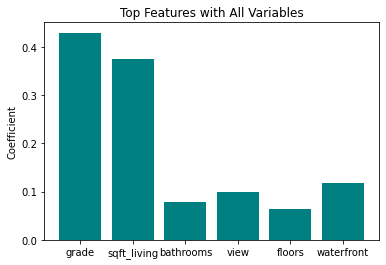

In [194]:
# Top results with positive coefficients
figsize=(10,15)
# df_kc_bar={'sqft_living':0.3741, 'bathrooms':0.0776, 'bedrooms':-0.0847, 'grade':0.4293, 'view':0.0992, 'floors':0.0645, 'waterfront':0.1188, 'sqft_living15':-0.0396}
df_kc_bar={'grade':0.4293, 'sqft_living':0.3741, 'bathrooms':0.0776,'view':0.0992, 'floors':0.0645, 'waterfront':0.1188}
plt.bar(range(len(df_kc_bar)), list(df_kc_bar.values()), align='center', color=['teal'])
plt.xticks(range(len(df_kc_bar)), list(df_kc_bar.keys()))
plt.title("Top Features with All Variables")
plt.ylabel('Coefficient')
plt.show()

### Without standardization

In [195]:
y = df_kc['price']
x = df_kc.drop(['price'], axis = 1)

# model1 = 'price_log ~ grade + bath + view + bed + floors + waterfront + sqft_living +sqft_living15 + sqft_above'
model1_fit = OLS(y,x).fit()
model1_fit_summ = model1_fit.summary()

model1_fit_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.887
Model:                            OLS   Adj. R-squared (uncentered):              0.887
Method:                 Least Squares   F-statistic:                          1.374e+04
Date:                Thu, 06 Jan 2022   Prob (F-statistic):                        0.00
Time:                        19:47:31   Log-Likelihood:                     -2.8765e+05
No. Observations:               21061   AIC:                                  5.753e+05
Df Residuals:                   21049   BIC:                                  5.754e+05
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -2.293e+04   2224.271    -10.309      0.000   -2.73e+04   -1.86e+04
waterfront     4.979e+05   1.99e+04     25.033      0.000    4.59e+05    5.37e+05
view           5.762e+04   2216.849     25.993      0.000    5.33e+04     6.2e+04
bathrooms     -3.045e+04   3302.932     -9.220      0.000   -3.69e+04    -2.4e+04
sqft_living     188.4634      4.633     40.675      0.000     179.382     197.545
sqft_lot          0.0931      0.050      1.873      0.061      -0.004       0.191
floors         8707.1854   3652.586      2.384      0.017    1547.836    1.59e+04
grade          1.137e+05   2201.040     51.647      0.000    1.09e+05    1.18e+05
sqft_above      -62.6930      4.496    -13.945      0.000     -71.505     -53.881
yr_built       -292.8967      6.985    -41.931      0.000    -306.588    -279.205
sqft_living15    39.5025      3.612     10.935      0.000      32.422      46.583
sqft_lot15       -0.6352      0.077     -8.205      0.000      -0.787      -0.483
==============================================================================
Omnibus:                    10117.284   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           145787.870
Skew:                           1.946   Prob(JB):                         0.00
Kurtosis:                      15.287   Cond. No.                     6.92e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.92e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

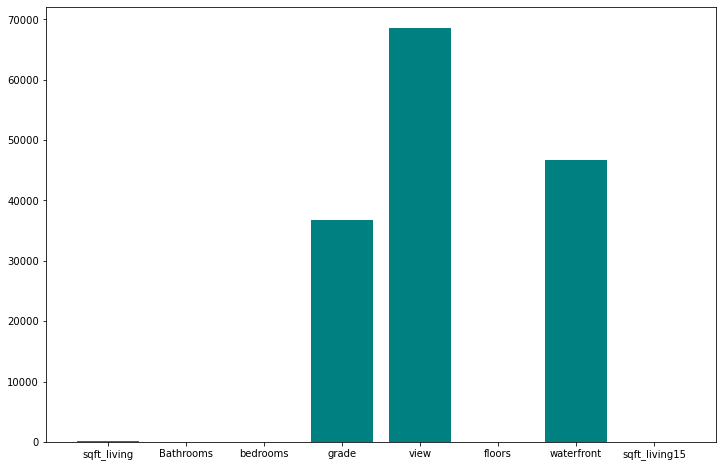

In [196]:
figure(figsize=(12,8))
df_kc_bar={'sqft_living':215.1753, 'Bathrooms':-0.0001582, 'bedrooms':-0.0006344, 'grade':36750, 'view':68630, 'floors':0.0001564, 'waterfront':46760, 'sqft_living15':30.6971}
plt.bar(range(len(df_kc_bar)), list(df_kc_bar.values()), align='center', color=['teal'])
plt.xticks(range(len(df_kc_bar)), list(df_kc_bar.keys()))
plt.show()

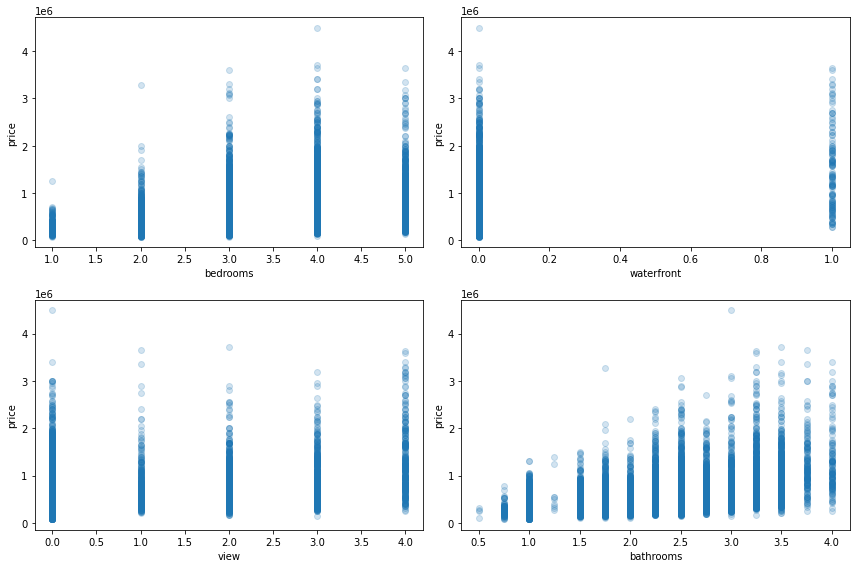

In [197]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(12, 8))
fig.set_tight_layout(True)

xcont = df_kc.select_dtypes(('int64', 'float64')).columns.drop(['yr_built', 'price', 'floors'])


for xcol, ax in zip(xcont, axes.flatten()):
    ax.scatter(df_kc[xcol], df_kc['price'], alpha=0.2)
    ax.set_xlabel(xcol)
    ax.set_ylabel("price")

In [198]:
# y = df_kc['price']
# x = df_kc.drop(['price', 'yr_built', 'sqft_lot15', 'sqft_lot', 'sqft_above'], axis = 1)

# model1 = 'price_log ~ grade + bath + view + bed + floors + waterfront + sqft_living +sqft_living15 + sqft_above'
# model1_fit = OLS(y,x).fit()
# model1_fit_summ = model1_fit.summary()

# model1_fit_summ .

## Model 2 - top 5 coefficients from Model 1

In [152]:
# xx = df_kc.drop(['price', 'yr_built', 'sqft_lot15', 'sqft_lot', 'sqft_above'],axis=1).values
xx = df_kc.drop(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'sqft_above', 'yr_built', 'sqft_lot15'], axis = 1).values
yy = df_kc['price'].values
x_train, x_test, y_train, y_test = train_test_split(xx,yy,test_size = .1)

In [153]:
xx

array([[   0.,    0., 1180.,    7., 1340.],
       [   0.,    0., 2570.,    7., 1690.],
       [   0.,    0.,  770.,    6., 2720.],
       ...,
       [   0.,    0., 1020.,    7., 1020.],
       [   0.,    0., 1600.,    8., 1410.],
       [   0.,    0., 1020.,    7., 1020.]])

In [154]:
Reg.fit(x_train, y_train)

LinearRegression()

In [155]:
# df_kc.head()

In [156]:
Reg.score(x_test, y_test)

0.5661575334910686

In [157]:
Reg.score(x_train, y_train)

0.562646480573759

In [158]:
dummy=DummyRegressor()

In [159]:
dummy.fit(x_train, y_train)

DummyRegressor()

In [160]:
dummy.score(x_test, y_test)

-0.000687369507220259

In [161]:
y_pred = Reg.predict(x_test)
y_pred

array([805727.29784693, 681315.30756115, 483115.02052467, ...,
       547126.97301735, 648232.6188562 , 516218.57478087])

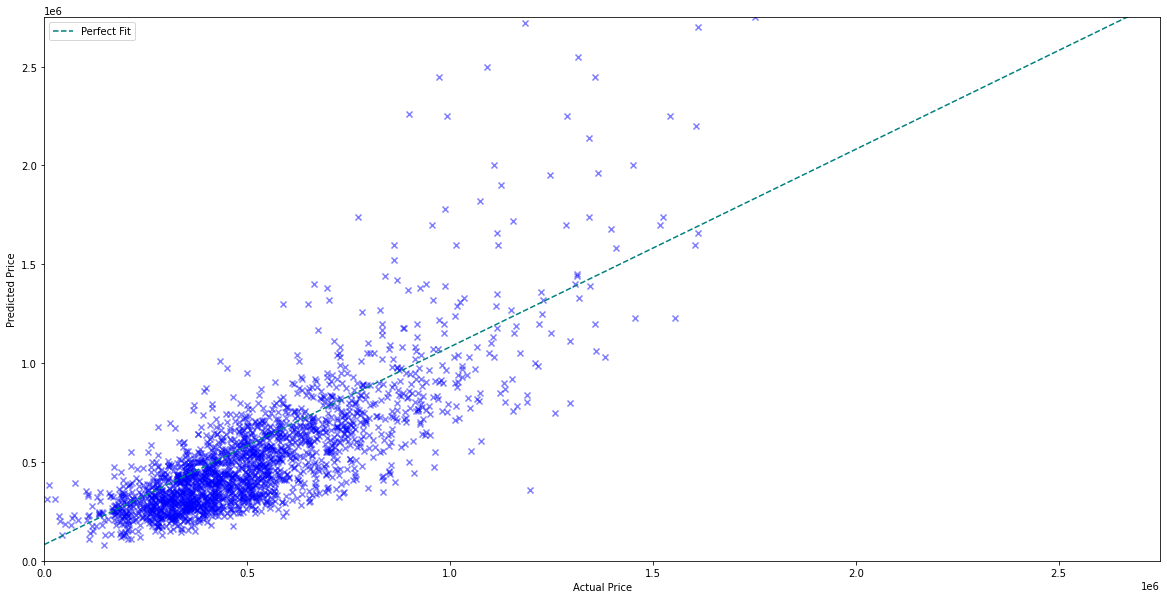

In [274]:
fig, ax = plt.subplots(figsize=(20,10))

perfect_line = np.arange(y_test.min(), y_test.max())
ax.plot(perfect_line, linestyle="--", color="teal", label="Perfect Fit")
ax.scatter(y_pred, y_test, alpha=0.5,marker= "x",color= "blue")
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
plt.title('', fontsize=16, y=.99, fontname='Silom')
ax.legend()
plt.xlim([0,2750000])
plt.ylim([0,2750000]);

## Multiple regression Model 2 using top five feature coeffecients from Model 1

#multiple regression model with grade, bathrooms, sqft living, and sqft living 15

model1 = 'price ~ sqft_living + grade + waterfront + view'
model1_fit = ols(formula= model1, data=df_kc).fit()
model1_fit_summ = model1_fit.summary()

model1_fit_summ

In [199]:
# multiple regression model with grade, view, waterfront, sqft_living and sqft_living15

model = 'price ~ grade + view + waterfront + sqft_living + sqft_living15'
model_fit = ols(formula= model, data=df_kc).fit()
model_fit_summ = model_fit.summary()

model_fit_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     5426.
Date:                Thu, 06 Jan 2022   Prob (F-statistic):               0.00
Time:                        19:47:32   Log-Likelihood:            -2.8818e+05
No. Observations:               21061   AIC:                         5.764e+05
Df Residuals:                   21055   BIC:                         5.764e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5.202e+05   1.16e+04    -44.788      0.000   -5.43e+05   -4.97e+05
grade          9.428e+04   2056.330     45.850      0.000    9.03e+04    9.83e+04
view           7.021e+04   2206.702     31.815      0.000    6.59e+04    7.45e+04
waterfront     4.944e+05   2.04e+04     24.282      0.000    4.55e+05    5.34e+05
sqft_living     123.5848      3.057     40.421      0.000     117.592     129.578
sqft_living15    28.2692      3.580      7.897      0.000      21.253      35.286
==============================================================================
Omnibus:                    10368.152   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           146911.884
Skew:                           2.017   Prob(JB):                         0.00
Kurtosis:                      15.294   Cond. No.                     4.19e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### With standardization

In [200]:
y = df_kc['price']
x = df_kc.drop(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'sqft_above', 'yr_built', 'sqft_lot15'], axis = 1)

x_scaler = StandardScaler()
x_standard = x_scaler.fit_transform(x)

y_scaler = StandardScaler()
y_standard = y_scaler.fit_transform(y.values.reshape(-1,1))

In [201]:
model1_fit = OLS(y_standard,x_standard).fit()
model1_fit_summ = model1_fit.summary()

model1_fit_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.563
Model:                            OLS   Adj. R-squared (uncentered):              0.563
Method:                 Least Squares   F-statistic:                              5426.
Date:                Thu, 06 Jan 2022   Prob (F-statistic):                        0.00
Time:                        19:47:32   Log-Likelihood:                         -21166.
No. Observations:               21061   AIC:                                  4.234e+04
Df Residuals:                   21056   BIC:                                  4.238e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1194      0.005     24.283      0.000       0.110       0.129
x2             0.1620      0.005     31.816      0.000       0.152       0.172
x3             0.3244      0.008     40.422      0.000       0.309       0.340
x4             0.3337      0.007     45.851      0.000       0.319       0.348
x5             0.0587      0.007      7.897      0.000       0.044       0.073
==============================================================================
Omnibus:                    10368.152   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           146911.884
Skew:                           2.017   Prob(JB):                         0.00
Kurtosis:                      15.294   Cond. No.                         3.44
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [202]:
#multiple regression model with log: grade, bathrooms, and sqft living

# model = 'price ~ sqft_living + sqft_living15 + waterfront + grade + view'
# model_fit = ols(formula= model, data=df_kc).fit()
# model_fit_summ = model_fit.summary()

# model_fit_summ

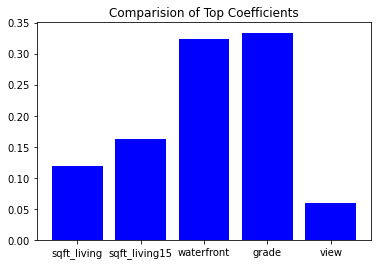

In [203]:
figsize=(15,11)
df_kc_bar={'sqft_living':0.1194, 'sqft_living15':0.1620, 'waterfront':0.3244, 'grade':0.3337, 'view':0.0587}
plt.bar(range(len(df_kc_bar)), list(df_kc_bar.values()), align='center', color=['blue','blue','blue','blue','blue'])
plt.xticks(range(len(df_kc_bar)), list(df_kc_bar.keys()))
plt.title("Comparision of Top Coefficients")
plt.show()

## Model 3 - top five most highly correlated to price

In [226]:
xx = df_kc.drop(['price', 'bedrooms', 'sqft_lot', 'floors', 'sqft_above','yr_built', 'sqft_lot15', 'waterfront'], axis = 1).values
yy = df_kc['price'].values
x_train, x_test, y_train, y_test = train_test_split(xx,yy,test_size = .1)

In [165]:
Reg.fit(x_train, y_train)

LinearRegression()

In [166]:
# df_kc.head()

In [167]:
Reg.score(x_test, y_test)

0.5310943047948756

In [168]:
Reg.score(x_train, y_train)

0.5565862765611302

In [169]:
dummy=DummyRegressor()

In [170]:
dummy.fit(x_train, y_train)

DummyRegressor()

In [171]:
dummy.score(x_test, y_test)

-0.00018918056356875823

In [172]:
y_pred = Reg.predict(x_test)
y_pred

array([ 632445.65931076,  956638.01624412,  314159.57792233, ...,
        345038.02652211, 1337642.67341441,  364544.11989339])

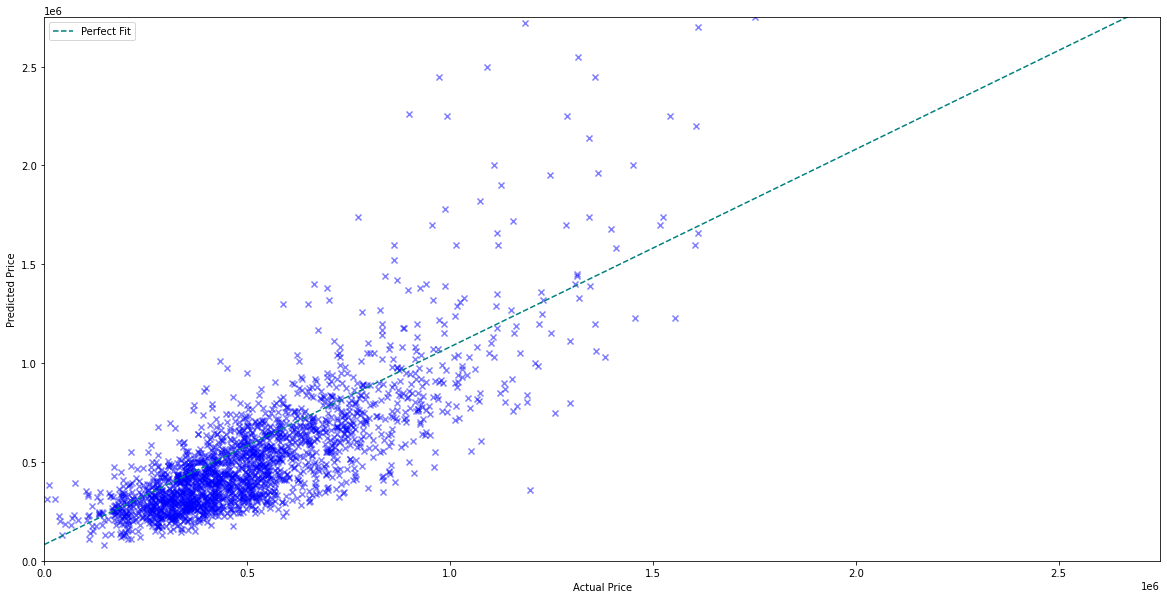

In [275]:
fig, ax = plt.subplots(figsize=(20,10))

perfect_line = np.arange(y_test.min(), y_test.max())
ax.plot(perfect_line, linestyle="--", color="teal", label="Perfect Fit")
ax.scatter(y_pred, y_test, alpha=0.5,marker= "x",color= "blue")
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
plt.title('', fontsize=16, y=.99, fontname='Silom')
ax.legend()
plt.xlim([0,2750000])
plt.ylim([0,2750000]);

## Multiple regression Model 3 using top five most highly correlated features

In [204]:
# multiple regression model with grade, view, bathrooms, sqft_living and sqft_living15

model = 'price ~ grade + view + bathrooms + sqft_living + sqft_living15'
model_fit = ols(formula= model, data=df_kc).fit()
model_fit_summ = model_fit.summary()

model_fit_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     5232.
Date:                Thu, 06 Jan 2022   Prob (F-statistic):               0.00
Time:                        19:47:32   Log-Likelihood:            -2.8840e+05
No. Observations:               21061   AIC:                         5.768e+05
Df Residuals:                   21055   BIC:                         5.769e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5.205e+05   1.17e+04    -44.367      0.000   -5.44e+05   -4.98e+05
grade          1.008e+05   2139.718     47.100      0.000    9.66e+04    1.05e+05
view           8.842e+04   2076.239     42.586      0.000    8.43e+04    9.25e+04
bathrooms     -3.875e+04   3113.592    -12.444      0.000   -4.48e+04   -3.26e+04
sqft_living     143.1310      3.445     41.550      0.000     136.379     149.883
sqft_living15    23.4397      3.620      6.474      0.000      16.343      30.536
==============================================================================
Omnibus:                    10817.657   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           163641.336
Skew:                           2.112   Prob(JB):                         0.00
Kurtosis:                      15.986   Cond. No.                     2.42e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### With standardization

In [205]:
y = df_kc['price']
x = df_kc.drop(['price', 'bedrooms', 'sqft_lot', 'floors', 'sqft_above','yr_built', 'sqft_lot15', 'waterfront'], axis = 1)

x_scaler = StandardScaler()
x_standard = x_scaler.fit_transform(x)

y_scaler = StandardScaler()
y_standard = y_scaler.fit_transform(y.values.reshape(-1,1))

In [206]:
model1_fit = OLS(y_standard,x_standard).fit()
model1_fit_summ = model1_fit.summary()

model1_fit_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.554
Model:                            OLS   Adj. R-squared (uncentered):              0.554
Method:                 Least Squares   F-statistic:                              5233.
Date:                Thu, 06 Jan 2022   Prob (F-statistic):                        0.00
Time:                        19:47:32   Log-Likelihood:                         -21380.
No. Observations:               21061   AIC:                                  4.277e+04
Df Residuals:                   21056   BIC:                                  4.281e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2041      0.005     42.587      0.000       0.195       0.213
x2            -0.0857      0.007    -12.444      0.000      -0.099      -0.072
x3             0.3757      0.009     41.551      0.000       0.358       0.393
x4             0.3567      0.008     47.101      0.000       0.342       0.372
x5             0.0487      0.008      6.474      0.000       0.034       0.063
==============================================================================
Omnibus:                    10817.657   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           163641.336
Skew:                           2.112   Prob(JB):                         0.00
Kurtosis:                      15.986   Cond. No.                         4.11
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

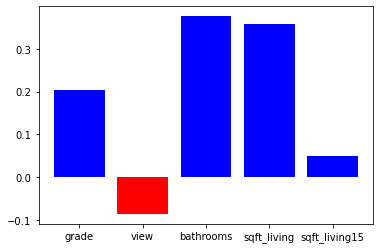

In [207]:
figsize=(8,6)
df_kc_bar={'grade':0.2041, 'view':-0.0857, 'bathrooms':0.3757, 'sqft_living':0.3567, 'sqft_living15':0.0487}
plt.bar(range(len(df_kc_bar)), list(df_kc_bar.values()), align='center', color=['blue','red','blue','blue','blue'])
plt.xticks(range(len(df_kc_bar)), list(df_kc_bar.keys()))
plt.show()

## Preparing to run regression models

In [174]:
def model_diagnostic(model, x, x_name, y):
    residuals = model.resid
    f = plt.figure()
    f, axes = plt.subplots(nrows = 1, ncols = 3, sharex=False, sharey = False, figsize=(65,20), squeeze=False)
    f.text(s="Model Diagnostic Summary", x=.40, y=1.15, fontsize=85, fontname='arial')
    f.text(s="r-Squared: {r}".format(r=round(model.rsquared, 2)), x=.40, y=1.05, fontsize=50, fontname='arial')
    f.text(s="p-value: {p}".format(p= model.f_pvalue), x=.53, y=1.05, fontsize=50, fontname='arial')
    f.text(s='Residuals Histogram', x=.45, y=.93, fontsize=55, fontname='arial')
    sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True, ax=axes[0][0])
    plt.show;
    f.text(s='QQ Plot', x=.20, y=.93, fontsize=55, fontname='arial')
    axes[0][1].hist(residuals)
    plt.show;
    sns.residplot(x, y, ax=axes[0][2])
    f.text(s='Residuals vs {x}'.format(x=x_name), x=.73, y=.93, fontsize=55, fontname='arial')
    plt.tight_layout;
    plt.show;

## Simple Linear Regressions

### Price related to square feet of living space

In [175]:
dff= "price ~ sqft_living"
dff_price_living = ols(formula= dff, data=df_kc).fit()
dff_price_living_summ = dff_price_living.summary()

dff_price_living_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                 1.726e+04
Date:                Thu, 06 Jan 2022   Prob (F-statistic):               0.00
Time:                        19:47:24   Log-Likelihood:            -2.9060e+05
No. Observations:               21061   AIC:                         5.812e+05
Df Residuals:                   21059   BIC:                         5.812e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4300.3669   4281.214      1.004      0.315   -4091.140    1.27e+04
sqft_living   255.6895      1.946    131.360      0.000     251.874     259.505
==============================================================================
Omnibus:                    11159.725   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           157649.890
Skew:                           2.228   Prob(JB):                         0.00
Kurtosis:                      15.641   Cond. No.                     5.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/Users/jeff/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

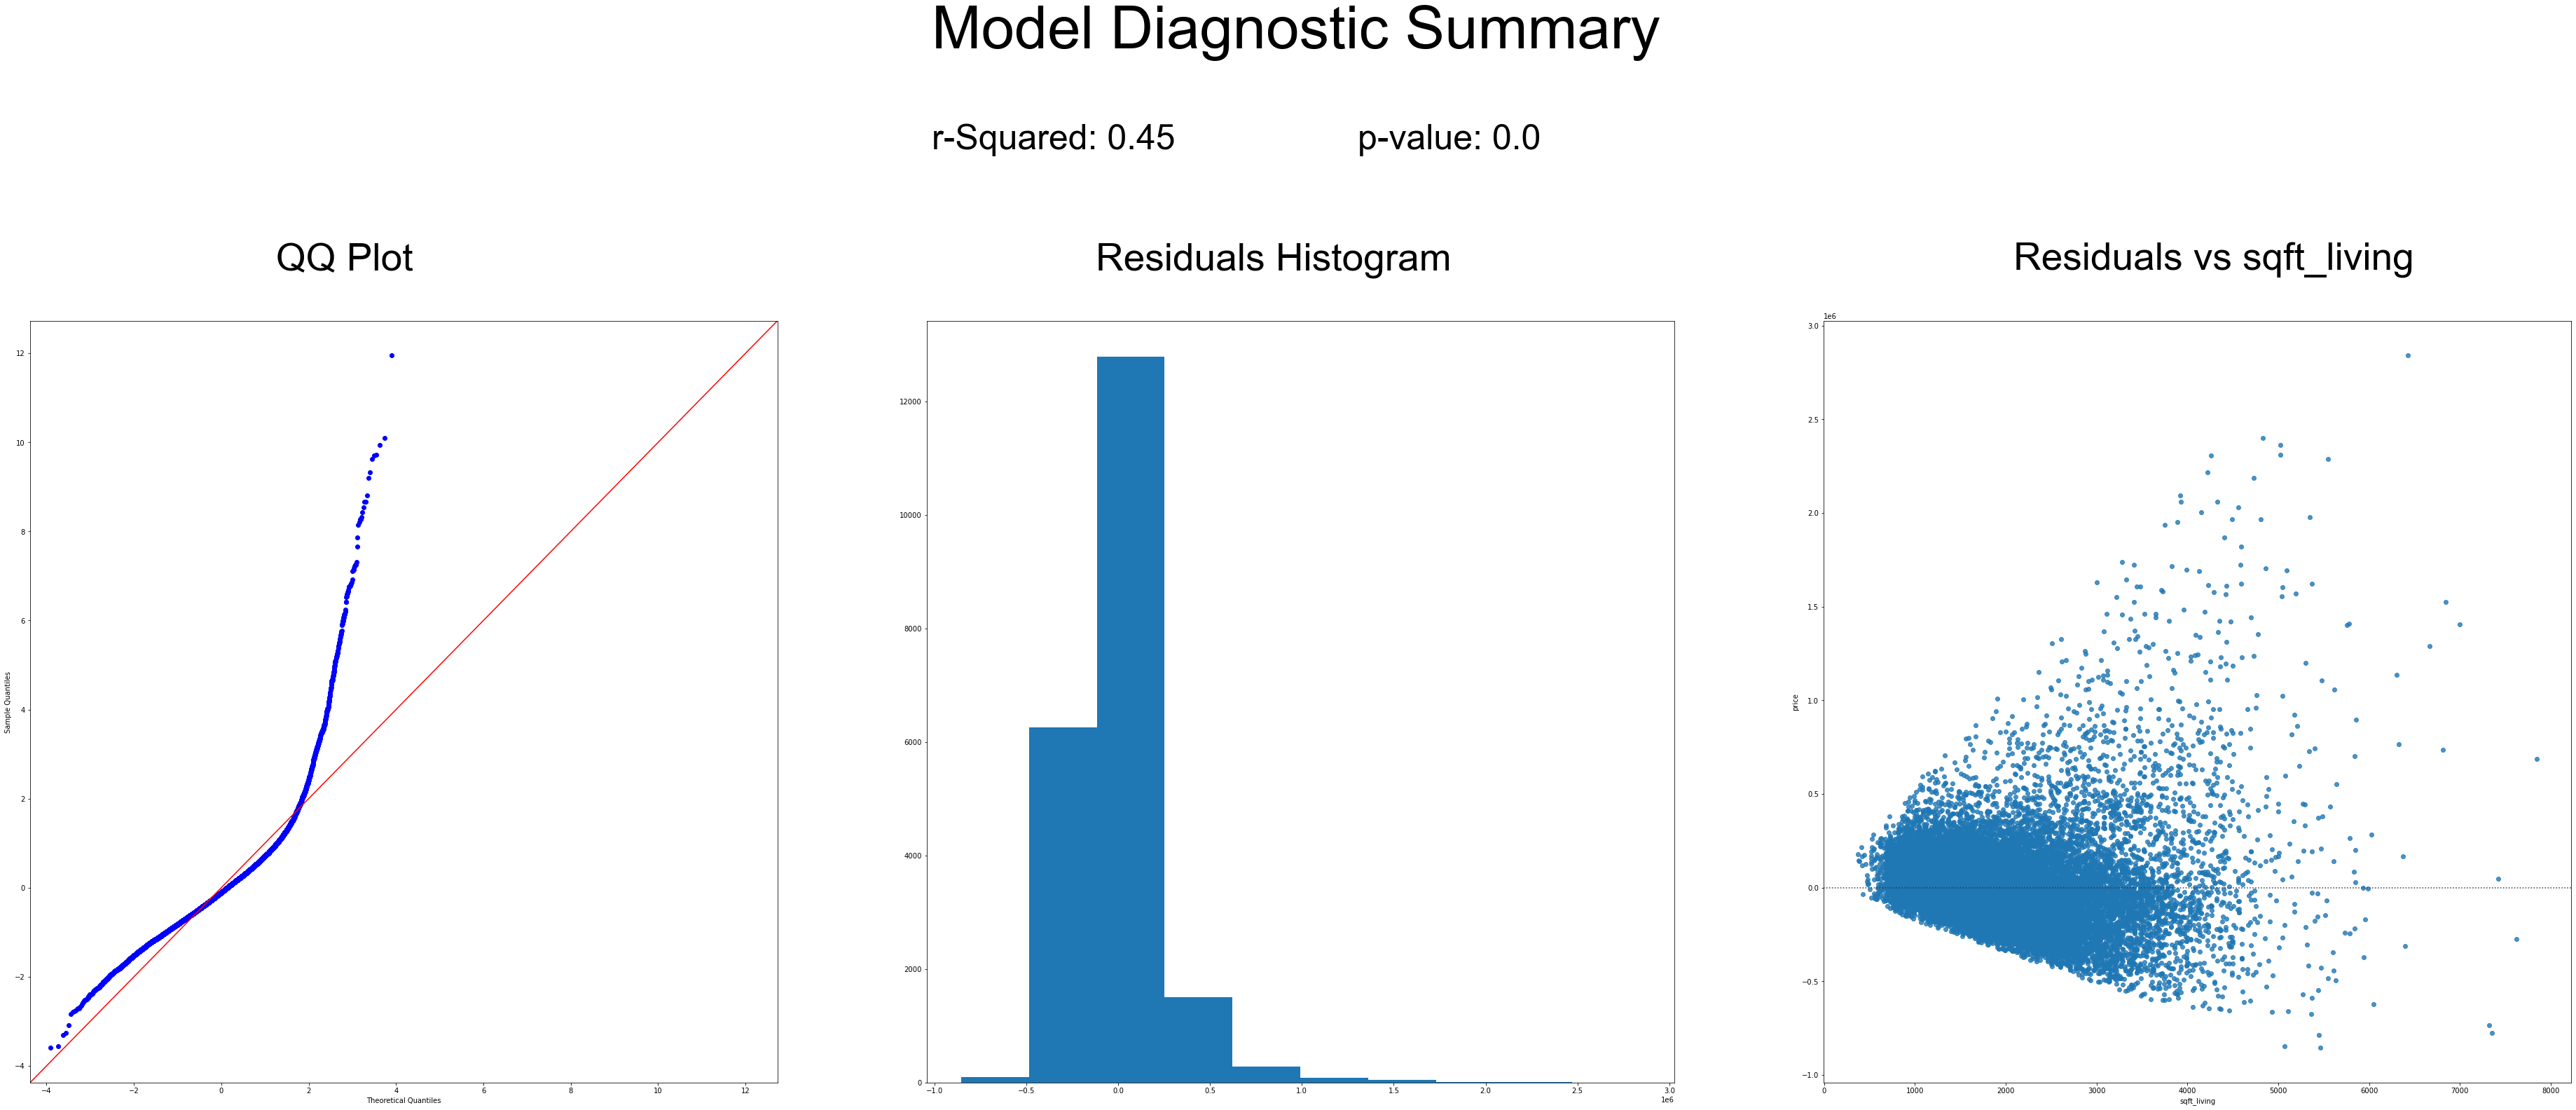

In [176]:
f = 'price~ sqft_living'
sqft_living_model = smf.ols(formula=f, data=df_kc).fit()
model_diagnostic(sqft_living_model, sqft_living, 'sqft_living', price)

In [177]:
# Logged to correct the distribution of residuals
dff= 'price_log ~ sqft_living_log'
dff_price_living = ols(formula= dff, data=df_kc).fit()
dff_price_living_summ = dff_price_living.summary()

dff_price_living_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                 1.591e+04
Date:                Thu, 06 Jan 2022   Prob (F-statistic):               0.00
Time:                        19:47:25   Log-Likelihood:                -9767.2
No. Observations:               21061   AIC:                         1.954e+04
Df Residuals:                   21059   BIC:                         1.955e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.9097      0.049    142.158      0.000       6.814       7.005
sqft_living_log     0.8125      0.006    126.122      0.000       0.800       0.825
==============================================================================
Omnibus:                      109.849   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.625
Skew:                           0.125   Prob(JB):                     3.83e-22
Kurtosis:                       2.777   Cond. No.                         141.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/Users/jeff/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

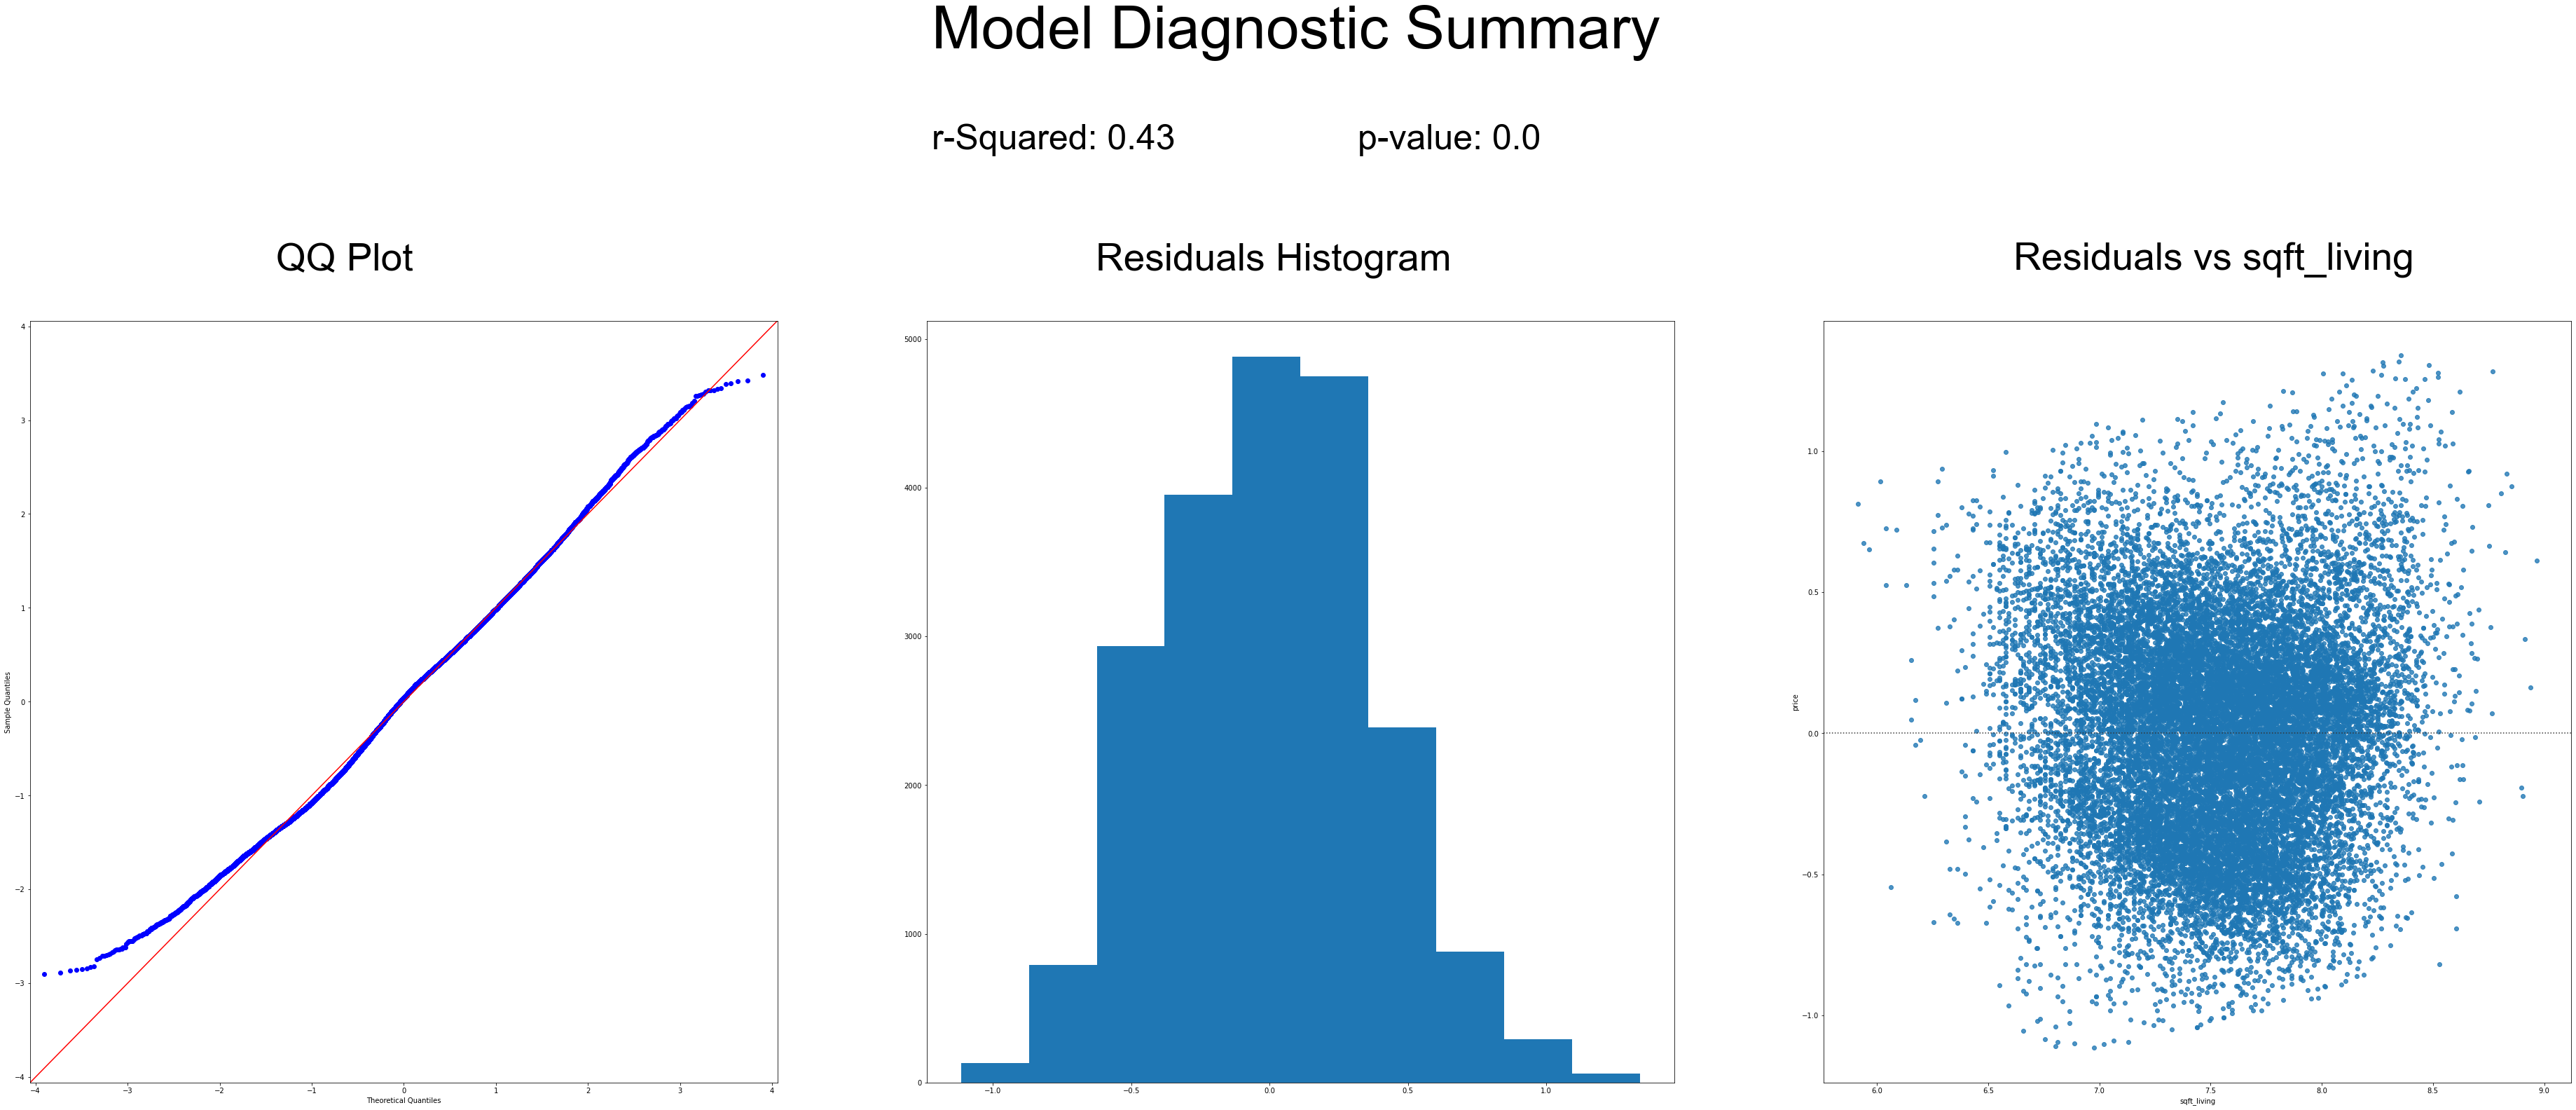

In [178]:
f = 'price_log ~ sqft_living_log'
sqft_living_model = smf.ols(formula=f, data=df_kc).fit()
model_diagnostic(sqft_living_model, sqft_living_log, 'sqft_living', price_log)

### Price related to quality of construction

In [179]:
dfff= "price ~ grade"
dfff_price_grade = ols(formula= dfff, data=df_kc).fit()
dfff_price_grade_summ = dfff_price_grade.summary()

dfff_price_grade_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                 1.661e+04
Date:                Thu, 06 Jan 2022   Prob (F-statistic):               0.00
Time:                        19:47:26   Log-Likelihood:            -2.9078e+05
No. Observations:               21061   AIC:                         5.816e+05
Df Residuals:                   21059   BIC:                         5.816e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9.067e+05   1.12e+04    -80.797      0.000   -9.29e+05   -8.85e+05
grade       1.876e+05   1455.782    128.887      0.000    1.85e+05     1.9e+05
==============================================================================
Omnibus:                    12618.903   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           222199.117
Skew:                           2.555   Prob(JB):                         0.00
Kurtosis:                      18.070   Cond. No.                         53.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [180]:
# Logged to correct the distribution of residuals
dfff= "price_log ~ grade_log"
dfff_price_grade = ols(formula= dfff, data=df_kc).fit()
dfff_price_grade_summ = dfff_price_grade.summary()

dfff_price_grade_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                 1.793e+04
Date:                Thu, 06 Jan 2022   Prob (F-statistic):               0.00
Time:                        19:47:26   Log-Likelihood:                -9206.6
No. Observations:               21061   AIC:                         1.842e+04
Df Residuals:                   21059   BIC:                         1.843e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.2454      0.036    230.103      0.000       8.175       8.316
grade_log      2.3684      0.018    133.895      0.000       2.334       2.403
==============================================================================
Omnibus:                      147.545   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.938
Skew:                           0.189   Prob(JB):                     3.74e-34
Kurtosis:                       3.182   Cond. No.                         34.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/Users/jeff/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

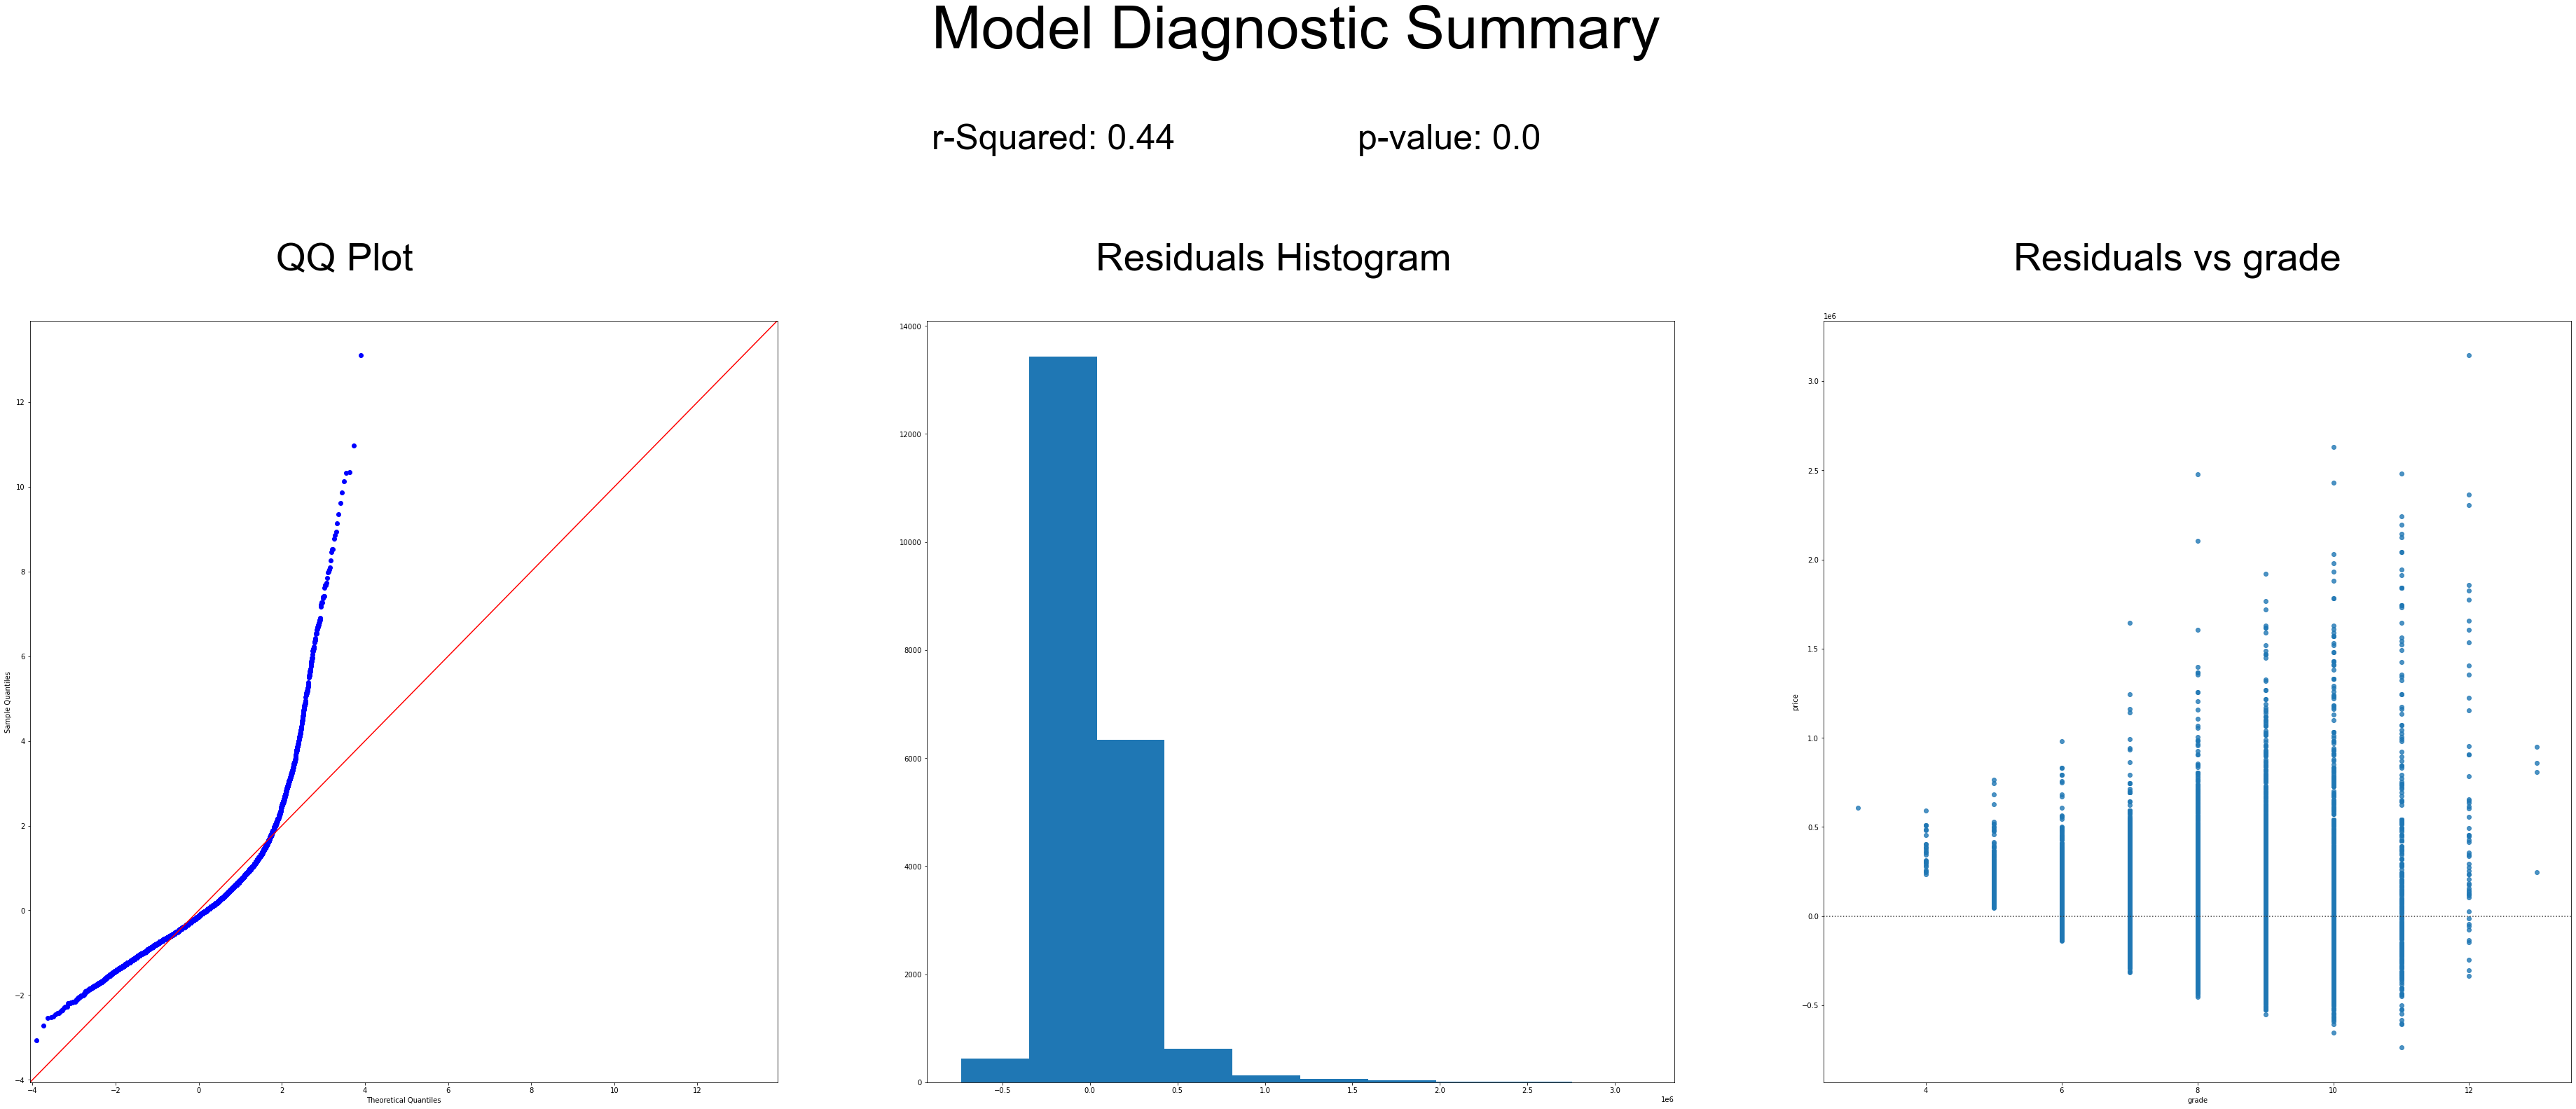

In [181]:
f = 'price ~ grade'
grade_model = smf.ols(formula=f, data=df_kc).fit()
model_diagnostic(grade_model, grade, 'grade', price)

/Users/jeff/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

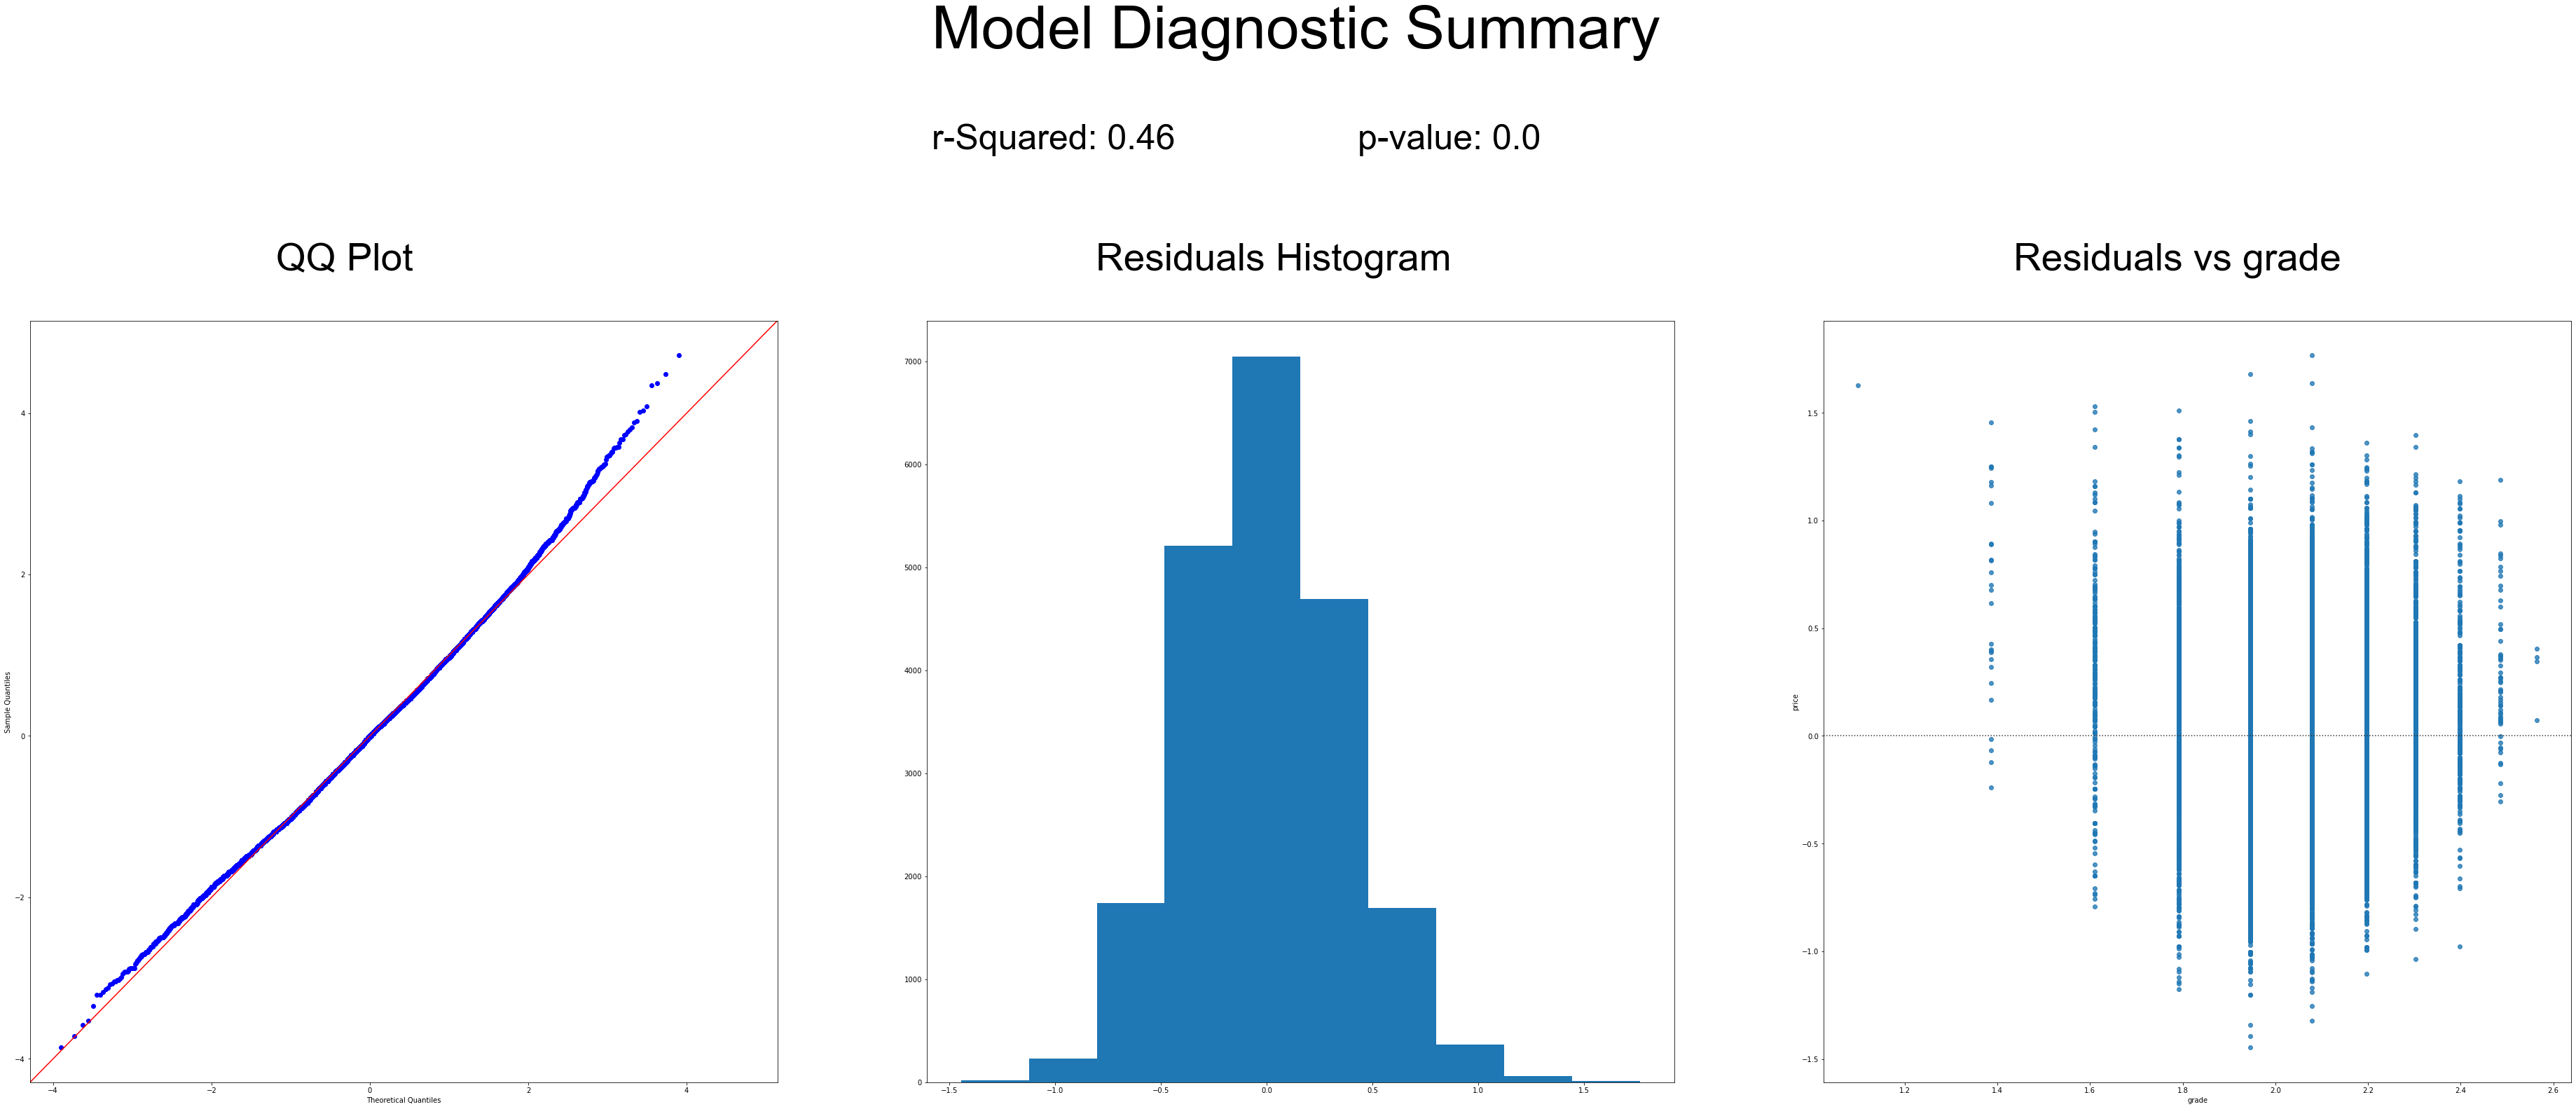

In [182]:
# Logged to correct the distribution of residuals
f = 'price_log ~ grade_log'
grade_model = smf.ols(formula=f, data=df_kc).fit()
model_diagnostic(grade_model, grade_log, 'grade', price_log)

## Price vs waterfront view

In [183]:
f = 'price ~ waterfront'
waterfront_model = smf.ols(formula=f, data=df_kc).fit()
waterfront_summ = waterfront_model.summary()

waterfront_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     1209.
Date:                Thu, 06 Jan 2022   Prob (F-statistic):          1.45e-257
Time:                        19:47:28   Log-Likelihood:            -2.9631e+05
No. Observations:               21061   AIC:                         5.926e+05
Df Residuals:                   21059   BIC:                         5.926e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.181e+05   2155.507    240.340      0.000    5.14e+05    5.22e+05
waterfront   9.65e+05   2.78e+04     34.766      0.000    9.11e+05    1.02e+06
==============================================================================
Omnibus:                    12099.900   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           153275.526
Skew:                           2.532   Prob(JB):                         0.00
Kurtosis:                      15.207   Cond. No.                         12.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [184]:
# Logged to correct the distribution of residuals
f = 'price_log ~ waterfront'
waterfront_log_model = smf.ols(formula=f, data=df_kc).fit()
waterfront_log_summ = waterfront_log_model.summary()

waterfront_log_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     501.1
Date:                Thu, 06 Jan 2022   Prob (F-statistic):          1.05e-109
Time:                        19:47:28   Log-Likelihood:                -15445.
No. Observations:               21061   AIC:                         3.089e+04
Df Residuals:                   21059   BIC:                         3.091e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0248      0.003   3740.512      0.000      13.018      13.032
waterfront     1.0038      0.045     22.385      0.000       0.916       1.092
==============================================================================
Omnibus:                      297.302   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              324.457
Skew:                           0.263   Prob(JB):                     3.51e-71
Kurtosis:                       3.305   Cond. No.                         12.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/Users/jeff/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

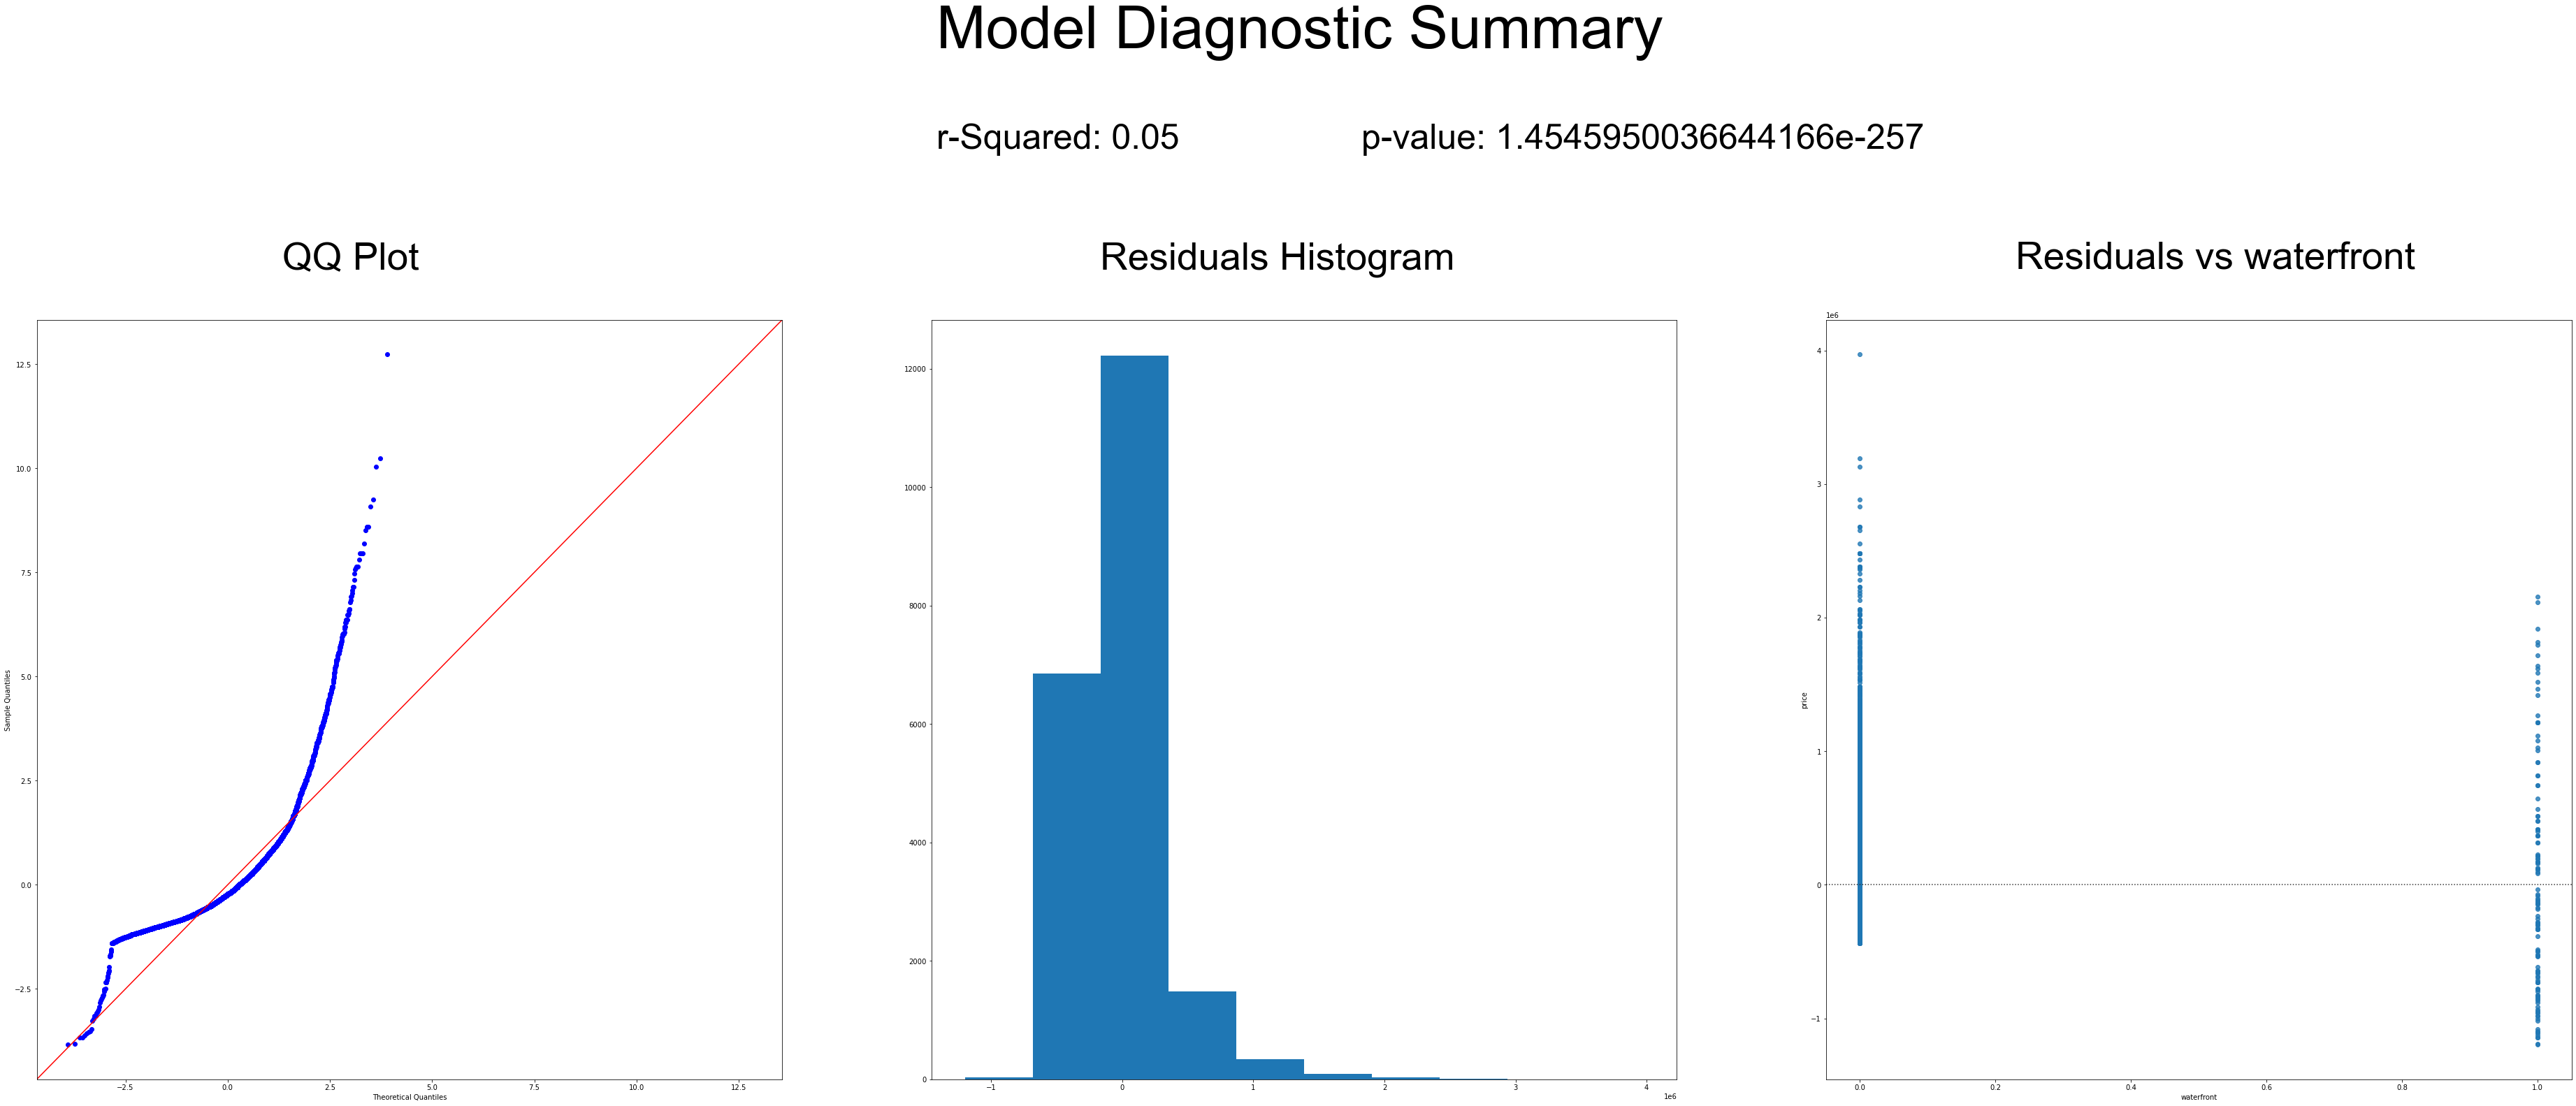

In [185]:
f = 'price ~ waterfront'
waterfront_model = smf.ols(formula=f, data=df_kc).fit()
model_diagnostic(waterfront_model, waterfront, 'waterfront', price)

/Users/jeff/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

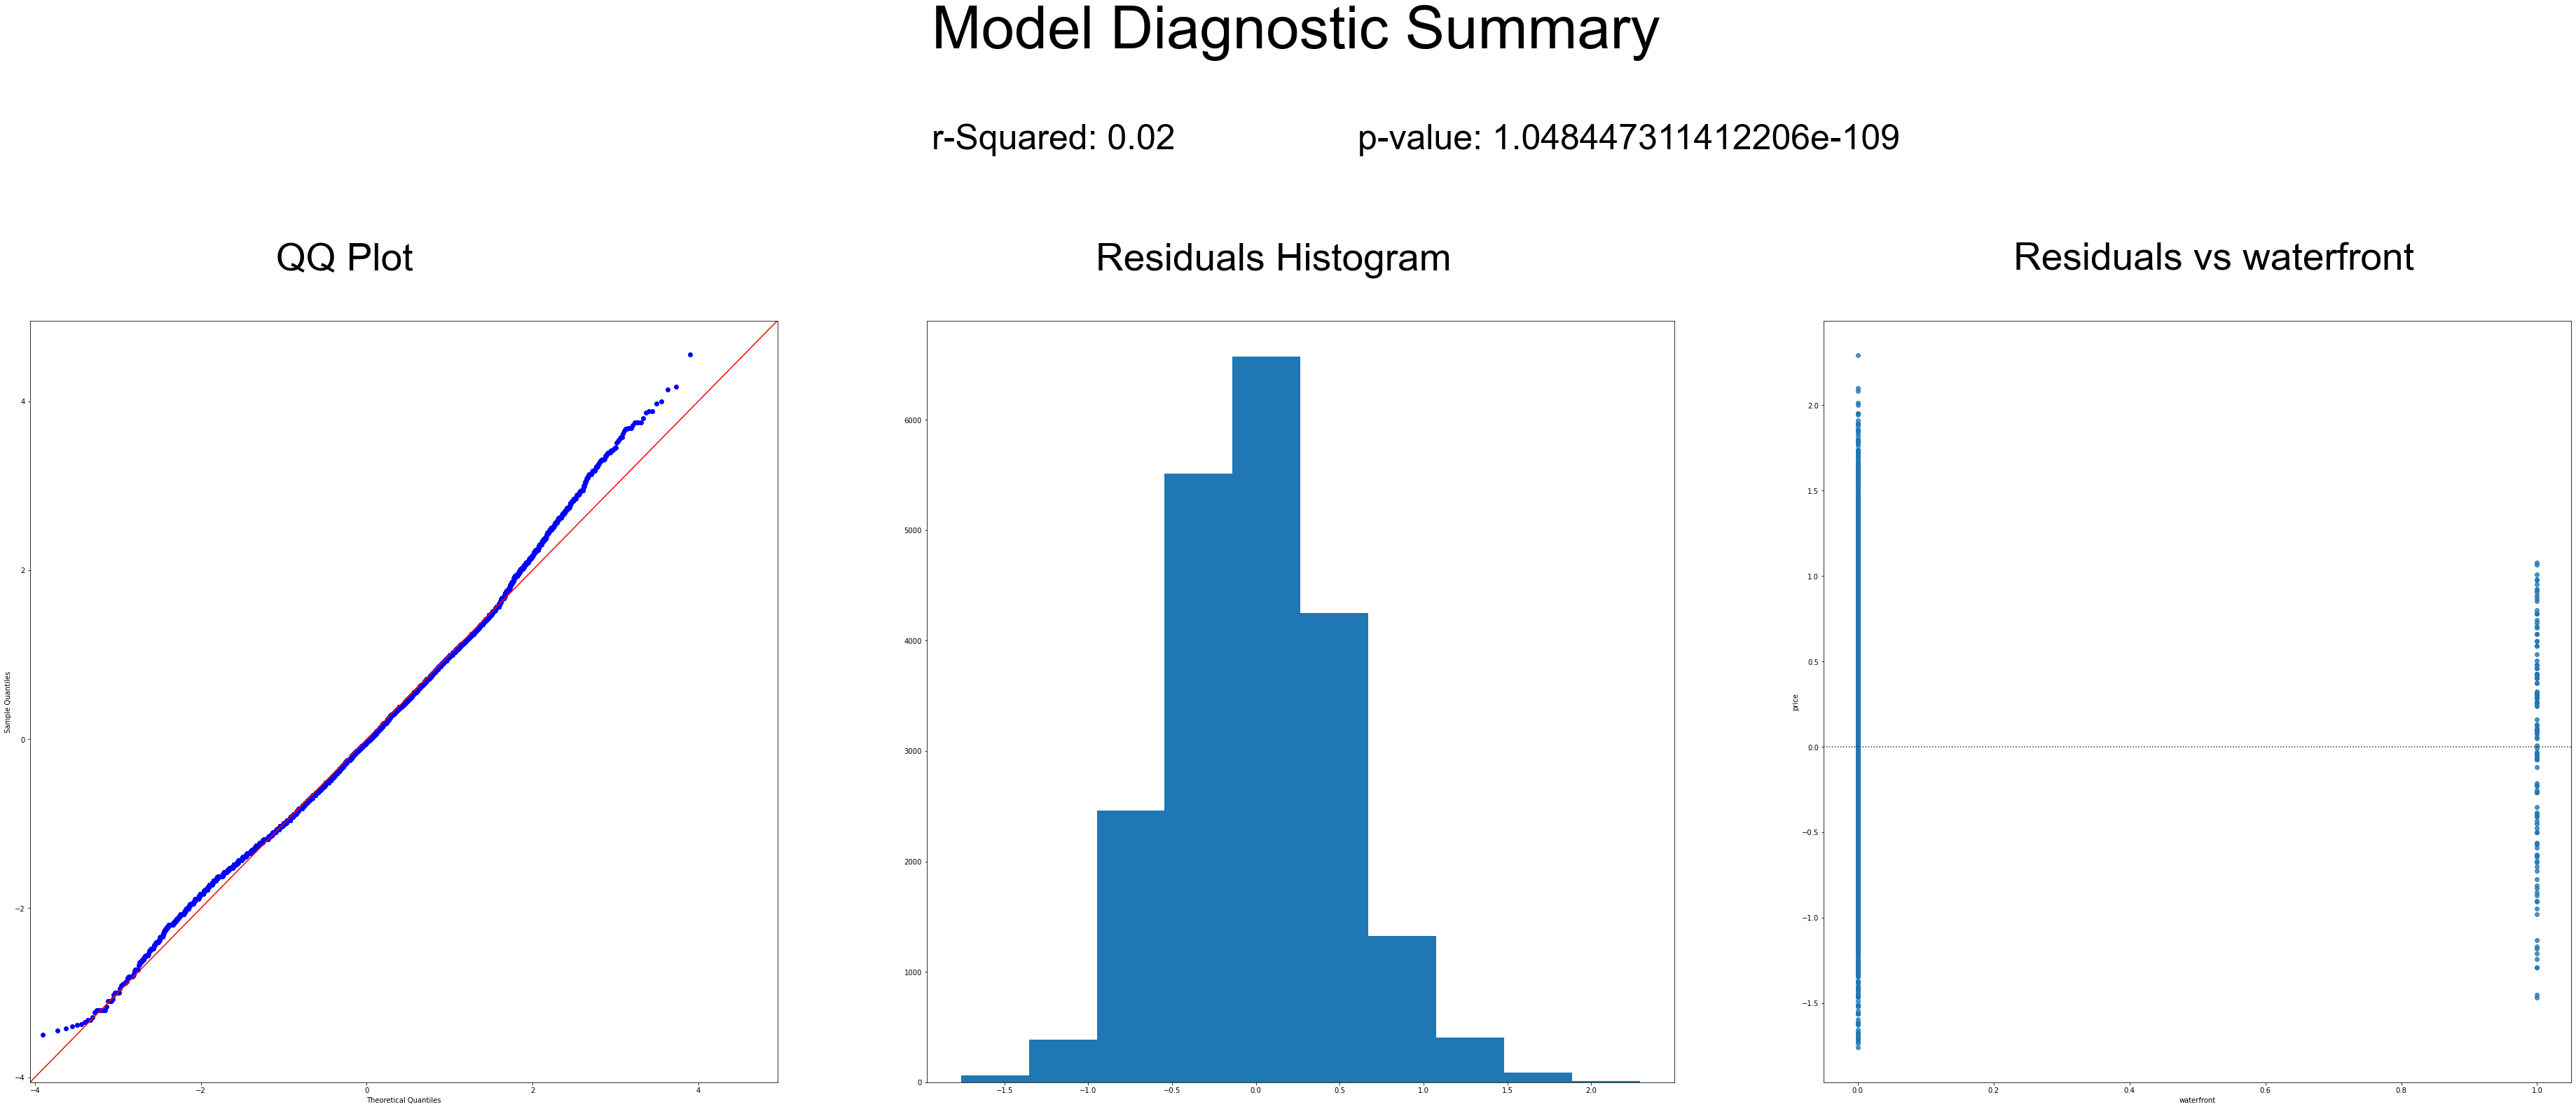

In [186]:
# Logged to correct the distribution of residuals
f = 'price_log ~ waterfront'
waterfront_log_model = smf.ols(formula=f, data=df_kc).fit()
model_diagnostic(waterfront_log_model, waterfront, 'waterfront', price_log)

## Price related to view

In [187]:
f = 'price ~ view'
model3 = smf.ols(formula=f, data=df_kc).fit()
model3_summ = model3.summary()

model3_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     3510.
Date:                Thu, 06 Jan 2022   Prob (F-statistic):               0.00
Time:                        19:47:29   Log-Likelihood:            -2.9528e+05
No. Observations:               21061   AIC:                         5.906e+05
Df Residuals:                   21059   BIC:                         5.906e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.879e+05   2134.175    228.604      0.000    4.84e+05    4.92e+05
view        1.638e+05   2764.147     59.246      0.000    1.58e+05    1.69e+05
==============================================================================
Omnibus:                    11900.123   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           159300.673
Skew:                           2.453   Prob(JB):                         0.00
Kurtosis:                      15.548   Cond. No.                         1.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [188]:
# Logged to correct the distribution of residuals
f = 'price_log ~ view'
view_log = smf.ols(formula=f, data=df_kc).fit()
view_log_summ = view_log.summary()

view_log_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     2469.
Date:                Thu, 06 Jan 2022   Prob (F-statistic):               0.00
Time:                        19:47:29   Log-Likelihood:                -14525.
No. Observations:               21061   AIC:                         2.905e+04
Df Residuals:                   21059   BIC:                         2.907e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.9818      0.003   3744.780      0.000      12.975      12.989
view           0.2231      0.004     49.690      0.000       0.214       0.232
==============================================================================
Omnibus:                      167.599   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.459
Skew:                           0.188   Prob(JB):                     3.95e-40
Kurtosis:                       3.257   Cond. No.                         1.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/Users/jeff/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

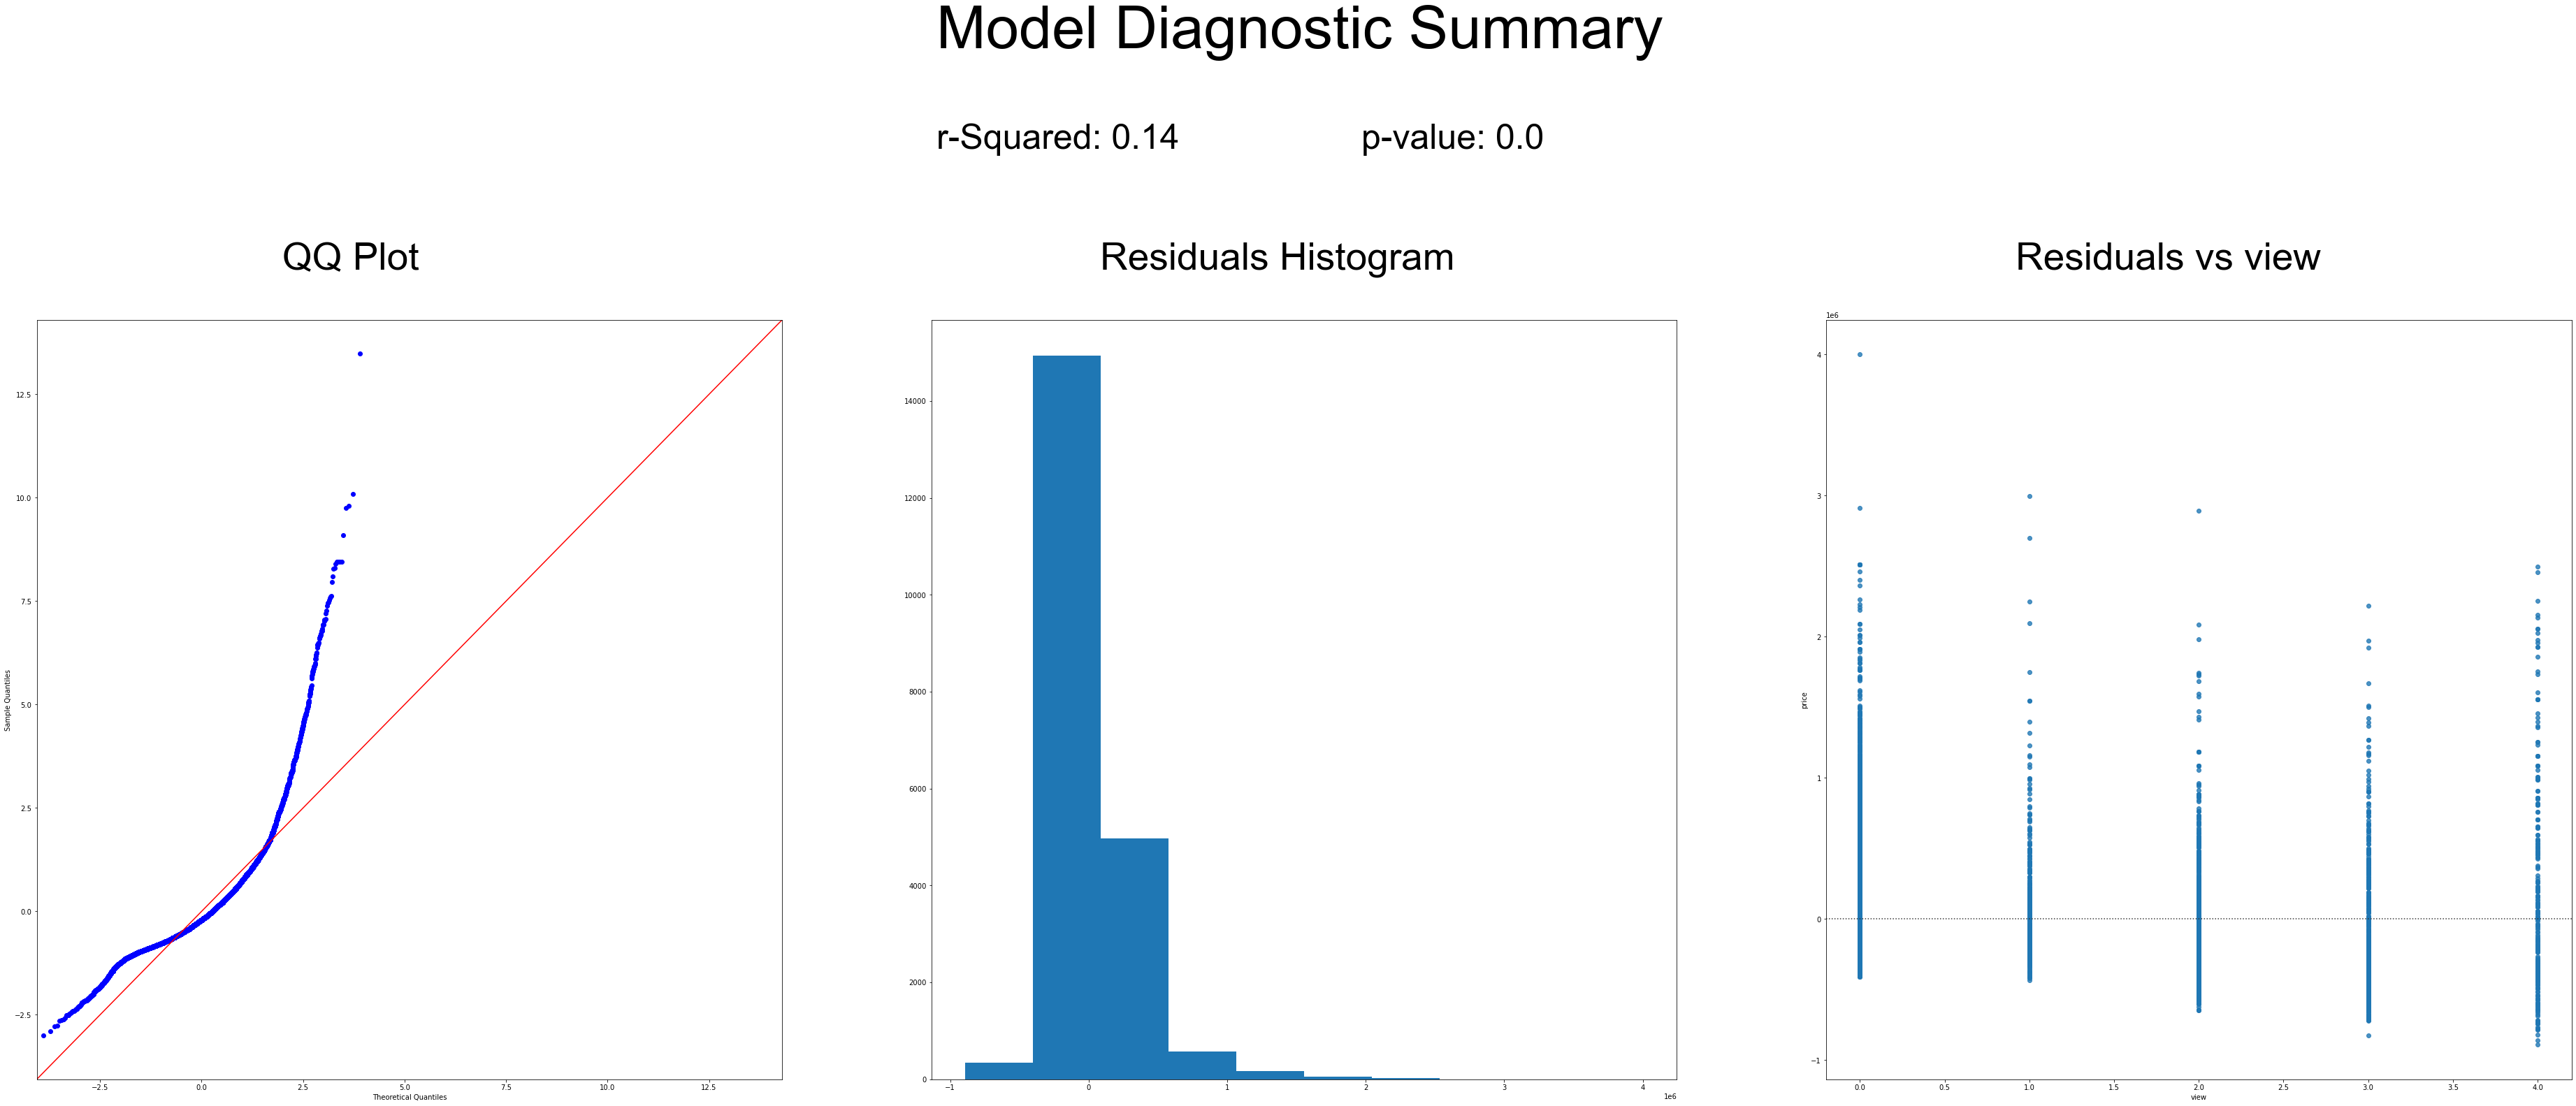

In [189]:
f = 'price ~ view'
view_model = smf.ols(formula=f, data=df_kc).fit()
model_diagnostic(view_model, view, 'view', price)

/Users/jeff/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

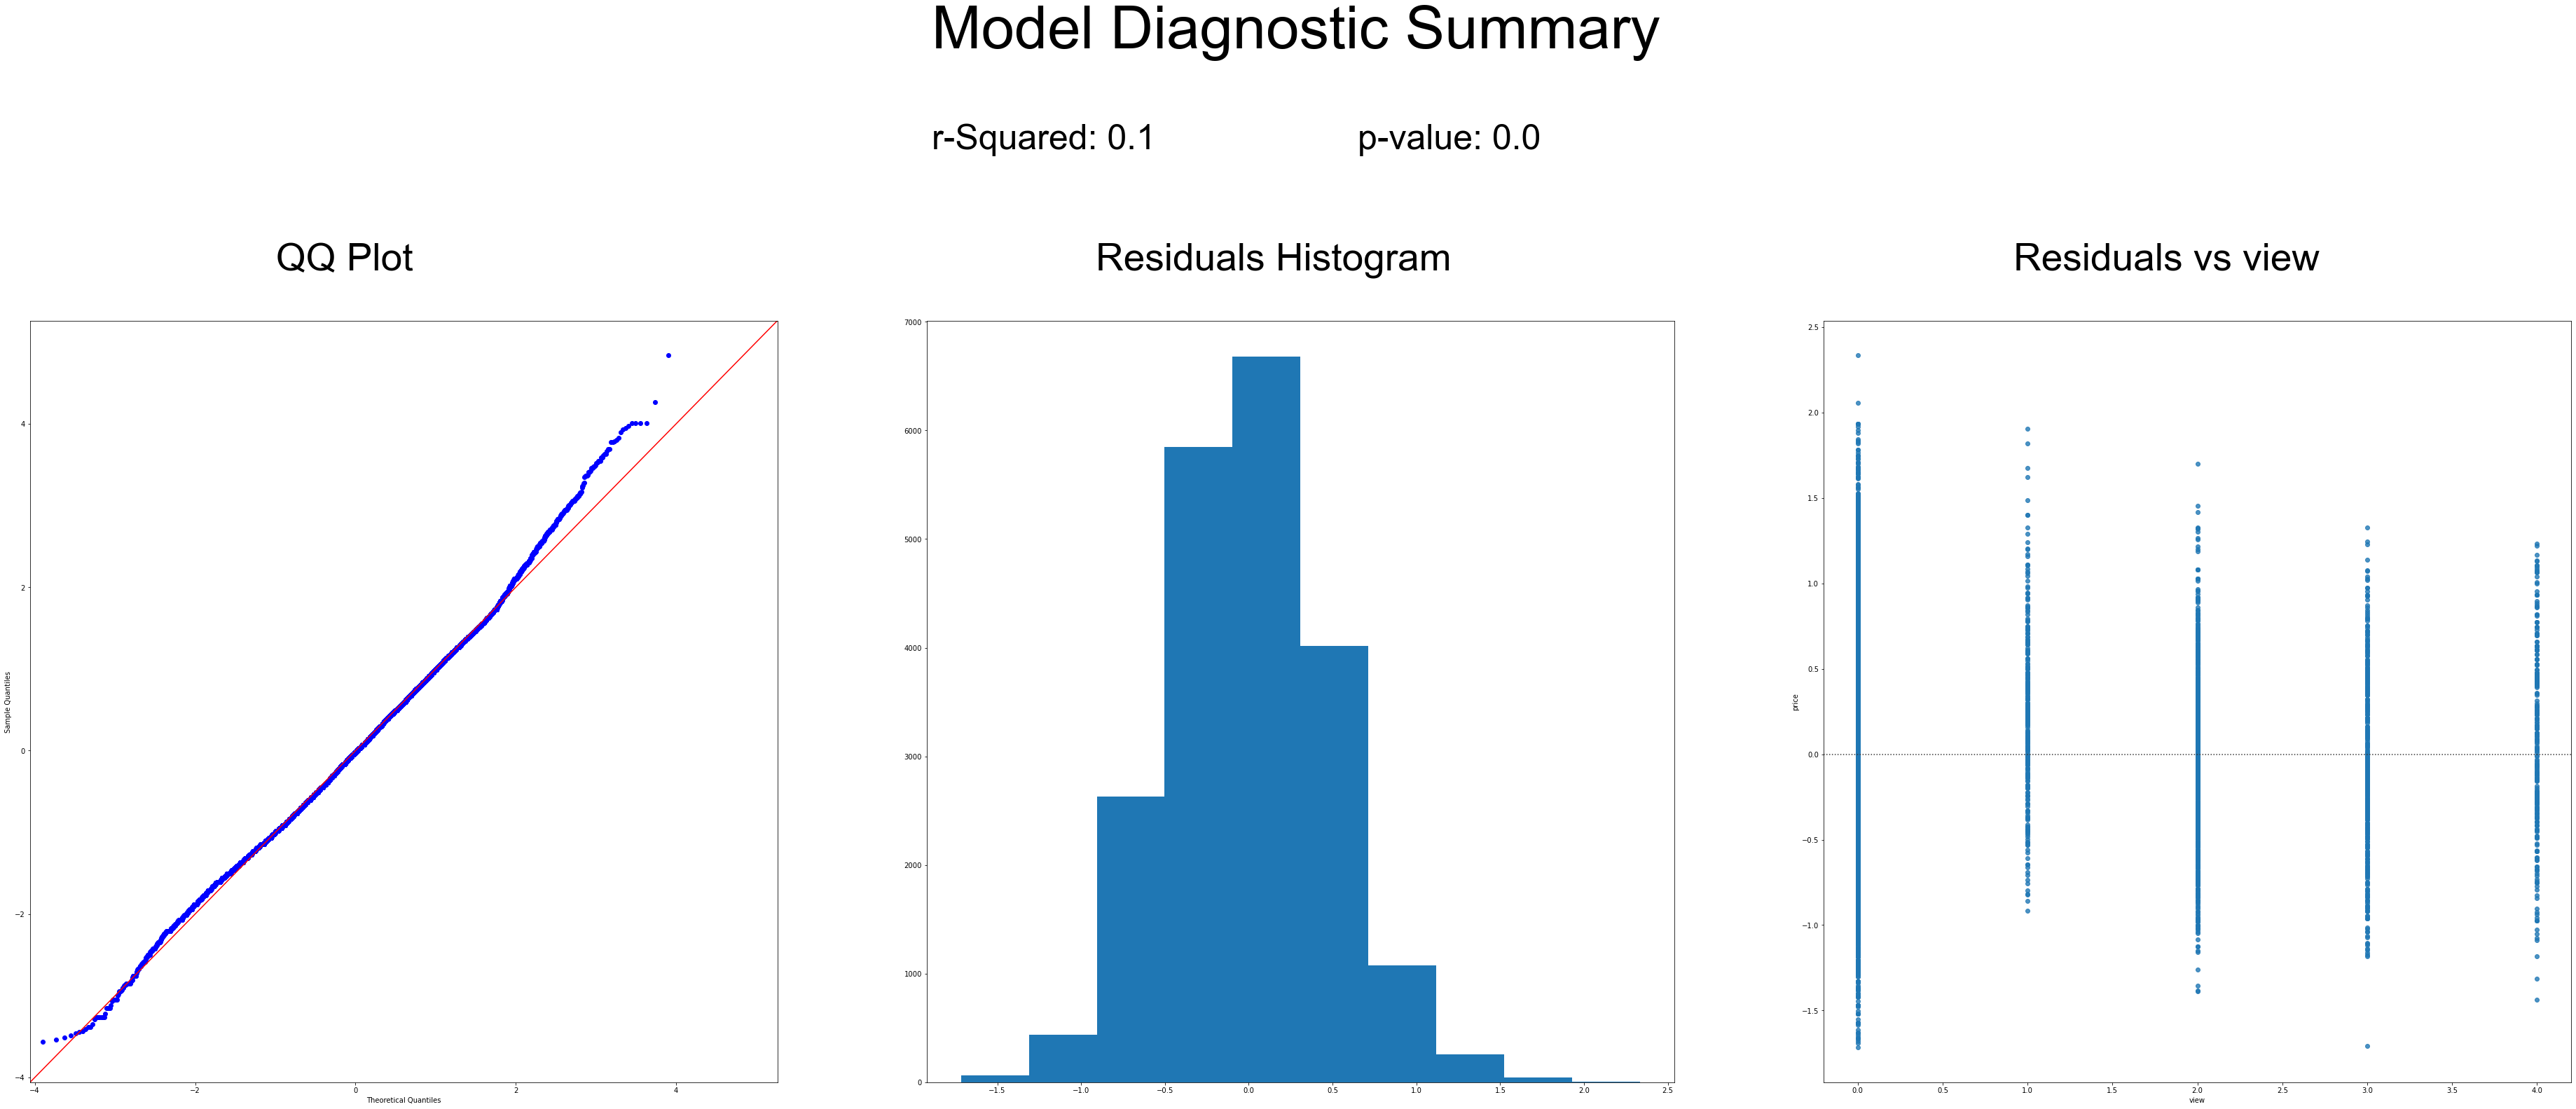

In [190]:
# Logged to correct the distribution of residuals
f = 'price_log ~ view'
view_model_log = smf.ols(formula=f, data=df_kc).fit()
model_diagnostic(view_model_log, view, 'view', price_log)

In [191]:
df_kc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21061 entries, 7129300520 to 1523300157
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21061 non-null  int64  
 1   waterfront     21061 non-null  int64  
 2   view           21061 non-null  float64
 3   bathrooms      21061 non-null  float64
 4   sqft_living    21061 non-null  int64  
 5   sqft_lot       21061 non-null  int64  
 6   floors         21061 non-null  float64
 7   grade          21061 non-null  int64  
 8   sqft_above     21061 non-null  int64  
 9   yr_built       21061 non-null  int64  
 10  sqft_living15  21061 non-null  int64  
 11  sqft_lot15     21061 non-null  int64  
 12  price          21061 non-null  float64
dtypes: float64(4), int64(9)
memory usage: 2.2 MB


## Multiple regression Model 3 using top five most highly correlated features

In [204]:
# multiple regression model with grade, view, bathrooms, sqft_living and sqft_living15

model = 'price ~ grade + view + bathrooms + sqft_living + sqft_living15'
model_fit = ols(formula= model, data=df_kc).fit()
model_fit_summ = model_fit.summary()

model_fit_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     5232.
Date:                Thu, 06 Jan 2022   Prob (F-statistic):               0.00
Time:                        19:47:32   Log-Likelihood:            -2.8840e+05
No. Observations:               21061   AIC:                         5.768e+05
Df Residuals:                   21055   BIC:                         5.769e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5.205e+05   1.17e+04    -44.367      0.000   -5.44e+05   -4.98e+05
grade          1.008e+05   2139.718     47.100      0.000    9.66e+04    1.05e+05
view           8.842e+04   2076.239     42.586      0.000    8.43e+04    9.25e+04
bathrooms     -3.875e+04   3113.592    -12.444      0.000   -4.48e+04   -3.26e+04
sqft_living     143.1310      3.445     41.550      0.000     136.379     149.883
sqft_living15    23.4397      3.620      6.474      0.000      16.343      30.536
==============================================================================
Omnibus:                    10817.657   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           163641.336
Skew:                           2.112   Prob(JB):                         0.00
Kurtosis:                      15.986   Cond. No.                     2.42e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### With standardization

In [205]:
y = df_kc['price']
x = df_kc.drop(['price', 'bedrooms', 'sqft_lot', 'floors', 'sqft_above','yr_built', 'sqft_lot15', 'waterfront'], axis = 1)

x_scaler = StandardScaler()
x_standard = x_scaler.fit_transform(x)

y_scaler = StandardScaler()
y_standard = y_scaler.fit_transform(y.values.reshape(-1,1))

In [206]:
model1_fit = OLS(y_standard,x_standard).fit()
model1_fit_summ = model1_fit.summary()

model1_fit_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.554
Model:                            OLS   Adj. R-squared (uncentered):              0.554
Method:                 Least Squares   F-statistic:                              5233.
Date:                Thu, 06 Jan 2022   Prob (F-statistic):                        0.00
Time:                        19:47:32   Log-Likelihood:                         -21380.
No. Observations:               21061   AIC:                                  4.277e+04
Df Residuals:                   21056   BIC:                                  4.281e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2041      0.005     42.587      0.000       0.195       0.213
x2            -0.0857      0.007    -12.444      0.000      -0.099      -0.072
x3             0.3757      0.009     41.551      0.000       0.358       0.393
x4             0.3567      0.008     47.101      0.000       0.342       0.372
x5             0.0487      0.008      6.474      0.000       0.034       0.063
==============================================================================
Omnibus:                    10817.657   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           163641.336
Skew:                           2.112   Prob(JB):                         0.00
Kurtosis:                      15.986   Cond. No.                         4.11
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

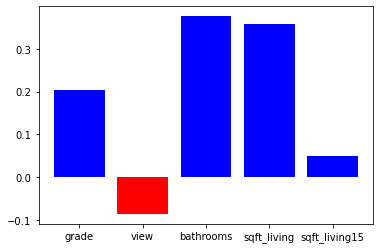

In [207]:
figsize=(8,6)
df_kc_bar={'grade':0.2041, 'view':-0.0857, 'bathrooms':0.3757, 'sqft_living':0.3567, 'sqft_living15':0.0487}
plt.bar(range(len(df_kc_bar)), list(df_kc_bar.values()), align='center', color=['blue','red','blue','blue','blue'])
plt.xticks(range(len(df_kc_bar)), list(df_kc_bar.keys()))
plt.show()